In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Reading in the CSV
df = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/Statcan-FT-canadian.csv", encoding='utf-8')

In [189]:
df.head(5)

REF_DATE     GEO           DGUID         Field of study  \
0  2011/2012  Canada  2021A000011124  Total, field of study   
1  2012/2013  Canada  2021A000011124  Total, field of study   
2  2013/2014  Canada  2021A000011124  Total, field of study   
3  2014/2015  Canada  2021A000011124  Total, field of study   
4  2015/2016  Canada  2021A000011124  Total, field of study   

          Program type         Credential type          Institution type  \
0  Total, program type  Total, credential type  Total, institution type    
1  Total, program type  Total, credential type  Total, institution type    
2  Total, program type  Total, credential type  Total, institution type    
3  Total, program type  Total, credential type  Total, institution type    
4  Total, program type  Total, credential type  Total, institution type    

  Registration status Status of student in Canada         Gender  ... UOM_ID  \
0   Full-time student           Canadian students  Total, gender  ...    223   
1   Full-time student           Canadian students  Total, gender  ...    223   
2   Full-time student           Canadian students  Total, gender  ...    223   
3   Full-time student           Canadian students  Total, gender  ...    223   
4   Full-time student           Canadian students  Total, gender  ...    223   

   SCALAR_FACTOR SCALAR_ID       VECTOR       COORDINATE      VALUE  STATUS  \
0          units         0  v1438513037  1.1.1.1.1.2.2.1  1353324.0     NaN   
1          units         0  v1438513037  1.1.1.1.1.2.2.1  1366443.0     NaN   
2          units         0  v1438513037  1.1.1.1.1.2.2.1  1378959.0     NaN   
3          units         0  v1438513037  1.1.1.1.1.2.2.1  1366716.0     NaN   
4          units         0  v1438513037  1.1.1.1.1.2.2.1  1355496.0     NaN   

  SYMBOL  TERMINATED  DECIMALS  
0    NaN         NaN         0  
1    NaN         NaN         0  
2    NaN         NaN         0  
3    NaN         NaN         0  
4    NaN         NaN         0  

[5 rows x 21 columns]

Lots of trash columns we can remove from the above

In [190]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Field of study', 'Program type',
       'Credential type', 'Institution type', 'Registration status',
       'Status of student in Canada', 'Gender', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [191]:
df.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

Cleaned off most columns, keeping Full-time Canadian to show the student type being investigated

In [192]:
# rename columns
df.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [193]:
df["FY Start"] = df["FY Start"].apply(lambda x: int(x[:4]))

In [194]:
df

FY Start                  School/Locality Registration status  \
0         2011                           Canada   Full-time student   
1         2012                           Canada   Full-time student   
2         2013                           Canada   Full-time student   
3         2014                           Canada   Full-time student   
4         2015                           Canada   Full-time student   
...        ...                              ...                 ...   
2743      2017  Nunavut Arctic College, Nunavut   Full-time student   
2744      2018  Nunavut Arctic College, Nunavut   Full-time student   
2745      2019  Nunavut Arctic College, Nunavut   Full-time student   
2746      2020  Nunavut Arctic College, Nunavut   Full-time student   
2747      2021  Nunavut Arctic College, Nunavut   Full-time student   

                 Status  Enrolment  
0     Canadian students  1353324.0  
1     Canadian students  1366443.0  
2     Canadian students  1378959.0  
3     Canadian students  1366716.0  
4     Canadian students  1355496.0  
...                 ...        ...  
2743  Canadian students      495.0  
2744  Canadian students      693.0  
2745  Canadian students      750.0  
2746  Canadian students      843.0  
2747  Canadian students      873.0  

[2748 rows x 5 columns]

### Split up the colleges/universities from Canada and the provincial totals

In [195]:
# List of provinces and territories in Canada
canadian_provinces_territories = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan",
    "Northwest Territories", "Nunavut", "Yukon", "Canada"
]

# Convert the list to a set for fast exact matching
province_set = set(canadian_provinces_territories)

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df = df[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df = df[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df['Institution Name'] = non_canada_df['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df = non_canada_df.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# save the DataFrames to CSVs if we want
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)


Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_91749/3190832476.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
colleges_universities_df

FY Start                                    School/Locality  \
22        2011  Memorial University of Newfoundland, Newfoundl...   
23        2012  Memorial University of Newfoundland, Newfoundl...   
24        2013  Memorial University of Newfoundland, Newfoundl...   
25        2014  Memorial University of Newfoundland, Newfoundl...   
26        2015  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
2743      2017                    Nunavut Arctic College, Nunavut   
2744      2018                    Nunavut Arctic College, Nunavut   
2745      2019                    Nunavut Arctic College, Nunavut   
2746      2020                    Nunavut Arctic College, Nunavut   
2747      2021                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
22     Full-time student  Canadian students    14097.0  
23     Full-time student  Canadian students    13923.0  
24     Full-time student  Canadian students    13611.0  
25     Full-time student  Canadian students    12996.0  
26     Full-time student  Canadian students    12795.0  
...                  ...                ...        ...  
2743   Full-time student  Canadian students      495.0  
2744   Full-time student  Canadian students      693.0  
2745   Full-time student  Canadian students      750.0  
2746   Full-time student  Canadian students      843.0  
2747   Full-time student  Canadian students      873.0  

[2594 rows x 5 columns]

In [197]:
canada_df['School/Locality'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

## Visualising Canadian Domestic student enrolment 2011-2021

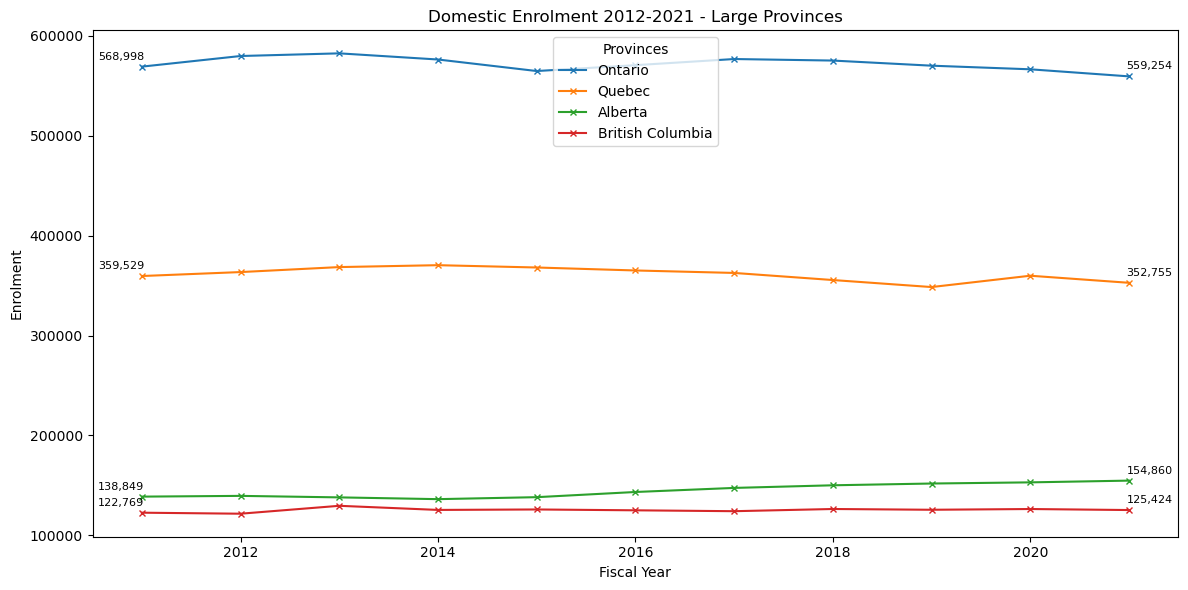

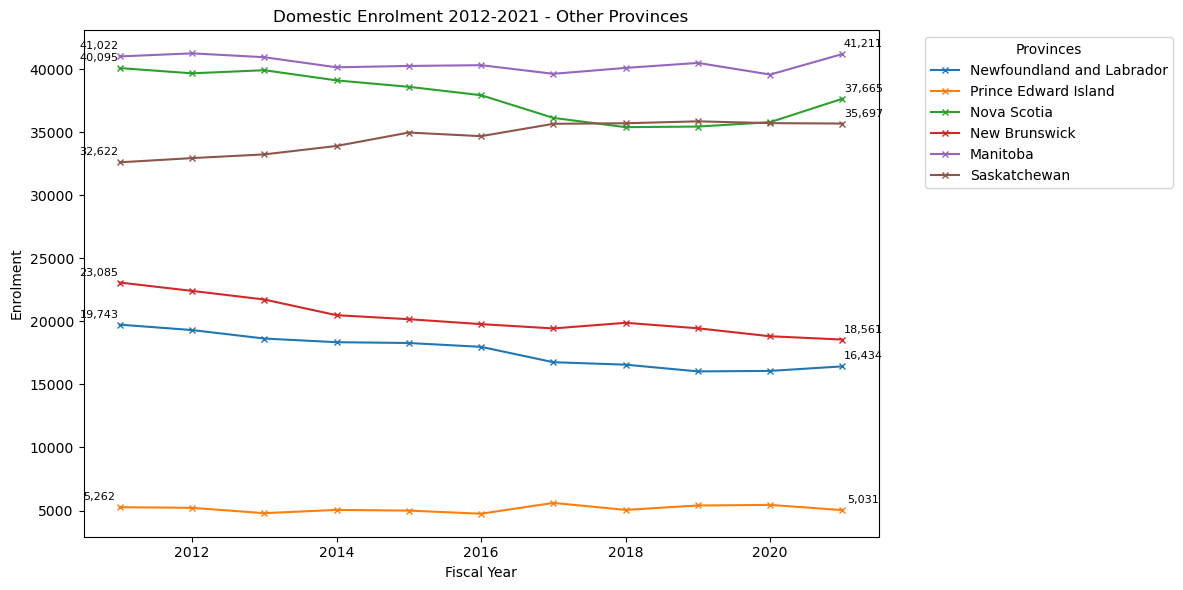

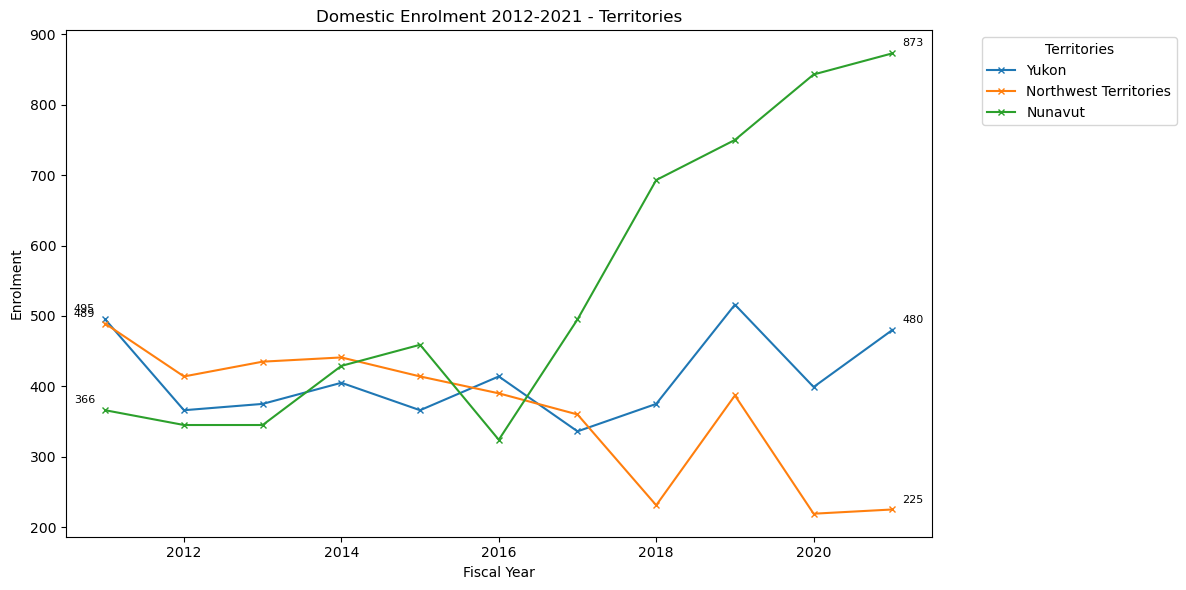

In [198]:
# Filter out rows where 'School/Locality' is "Canada" - the national figure will mess up the scale
provinces_df = canada_df[~canada_df['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2011)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]), # iloc[0] is the first value
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2021)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]), # iloc[-1] is the last value in the Series
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], label=province)
ax.set_title('Domestic Enrolment 2012-2021 - Large Provinces')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('Domestic Enrolment 2012-2021 - Other Provinces')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df[provinces_df['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('Domestic Enrolment 2012-2021 - Territories')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [199]:
colleges_universities_df

FY Start                                    School/Locality  \
22        2011  Memorial University of Newfoundland, Newfoundl...   
23        2012  Memorial University of Newfoundland, Newfoundl...   
24        2013  Memorial University of Newfoundland, Newfoundl...   
25        2014  Memorial University of Newfoundland, Newfoundl...   
26        2015  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
2743      2017                    Nunavut Arctic College, Nunavut   
2744      2018                    Nunavut Arctic College, Nunavut   
2745      2019                    Nunavut Arctic College, Nunavut   
2746      2020                    Nunavut Arctic College, Nunavut   
2747      2021                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
22     Full-time student  Canadian students    14097.0  
23     Full-time student  Canadian students    13923.0  
24     Full-time student  Canadian students    13611.0  
25     Full-time student  Canadian students    12996.0  
26     Full-time student  Canadian students    12795.0  
...                  ...                ...        ...  
2743   Full-time student  Canadian students      495.0  
2744   Full-time student  Canadian students      693.0  
2745   Full-time student  Canadian students      750.0  
2746   Full-time student  Canadian students      843.0  
2747   Full-time student  Canadian students      873.0  

[2594 rows x 5 columns]

In [200]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df[['School Name', 'Province/Territory']] = colleges_universities_df['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df.head())

    FY Start Registration status             Status  Enrolment  \
22      2011   Full-time student  Canadian students    14097.0   
23      2012   Full-time student  Canadian students    13923.0   
24      2013   Full-time student  Canadian students    13611.0   
25      2014   Full-time student  Canadian students    12996.0   
26      2015   Full-time student  Canadian students    12795.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


In [201]:
colleges_universities_df

FY Start Registration status             Status  Enrolment  \
22        2011   Full-time student  Canadian students    14097.0   
23        2012   Full-time student  Canadian students    13923.0   
24        2013   Full-time student  Canadian students    13611.0   
25        2014   Full-time student  Canadian students    12996.0   
26        2015   Full-time student  Canadian students    12795.0   
...        ...                 ...                ...        ...   
2743      2017   Full-time student  Canadian students      495.0   
2744      2018   Full-time student  Canadian students      693.0   
2745      2019   Full-time student  Canadian students      750.0   
2746      2020   Full-time student  Canadian students      843.0   
2747      2021   Full-time student  Canadian students      873.0   

                              School Name         Province/Territory  
22    Memorial University of Newfoundland  Newfoundland and Labrador  
23    Memorial University of Newfoundland  Newfoundland and Labrador  
24    Memorial University of Newfoundland  Newfoundland and Labrador  
25    Memorial University of Newfoundland  Newfoundland and Labrador  
26    Memorial University of Newfoundland  Newfoundland and Labrador  
...                                   ...                        ...  
2743               Nunavut Arctic College                    Nunavut  
2744               Nunavut Arctic College                    Nunavut  
2745               Nunavut Arctic College                    Nunavut  
2746               Nunavut Arctic College                    Nunavut  
2747               Nunavut Arctic College                    Nunavut  

[2594 rows x 6 columns]

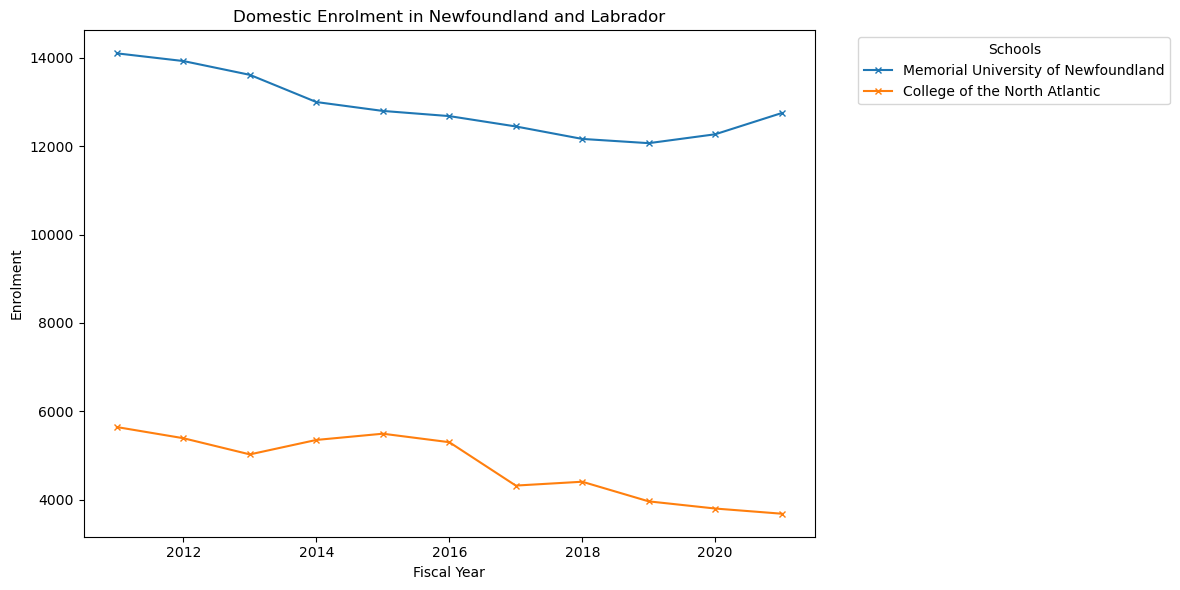

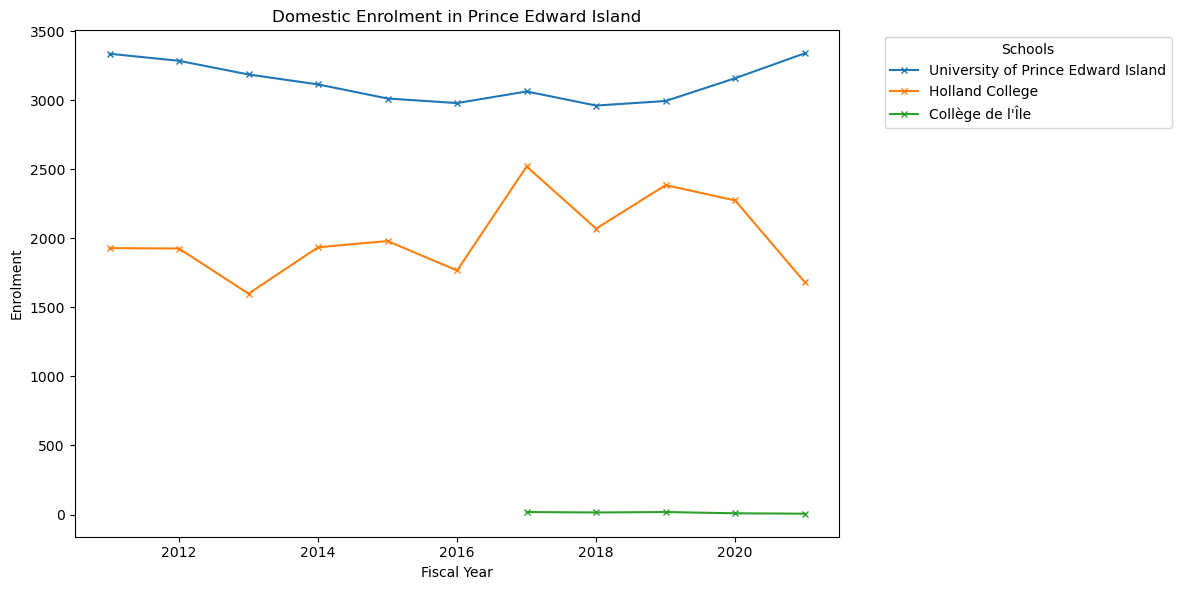

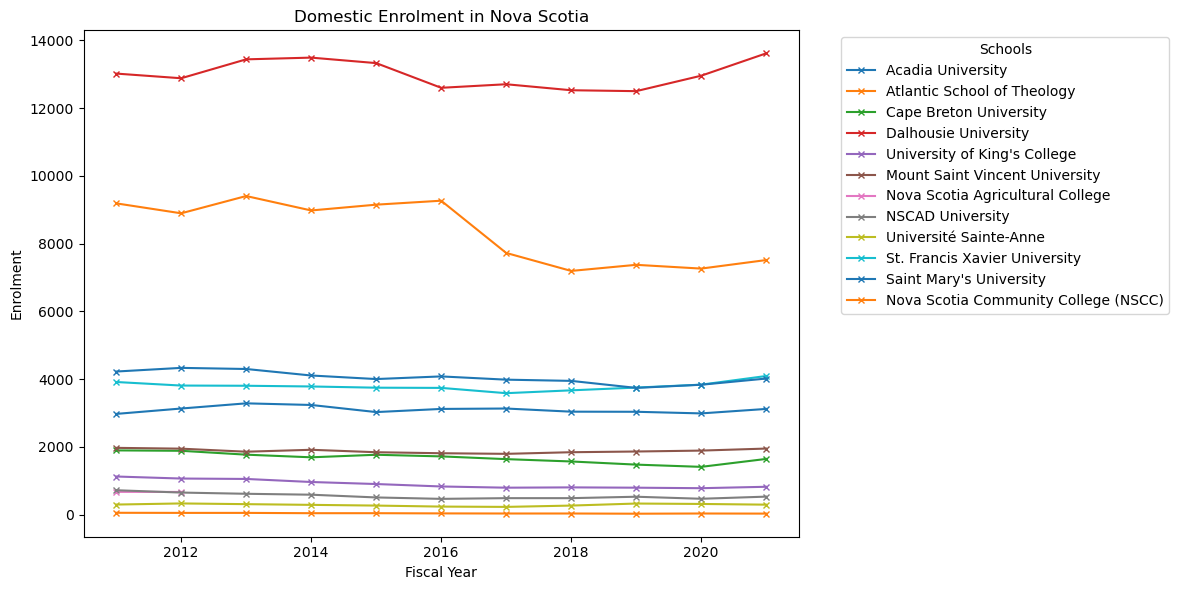

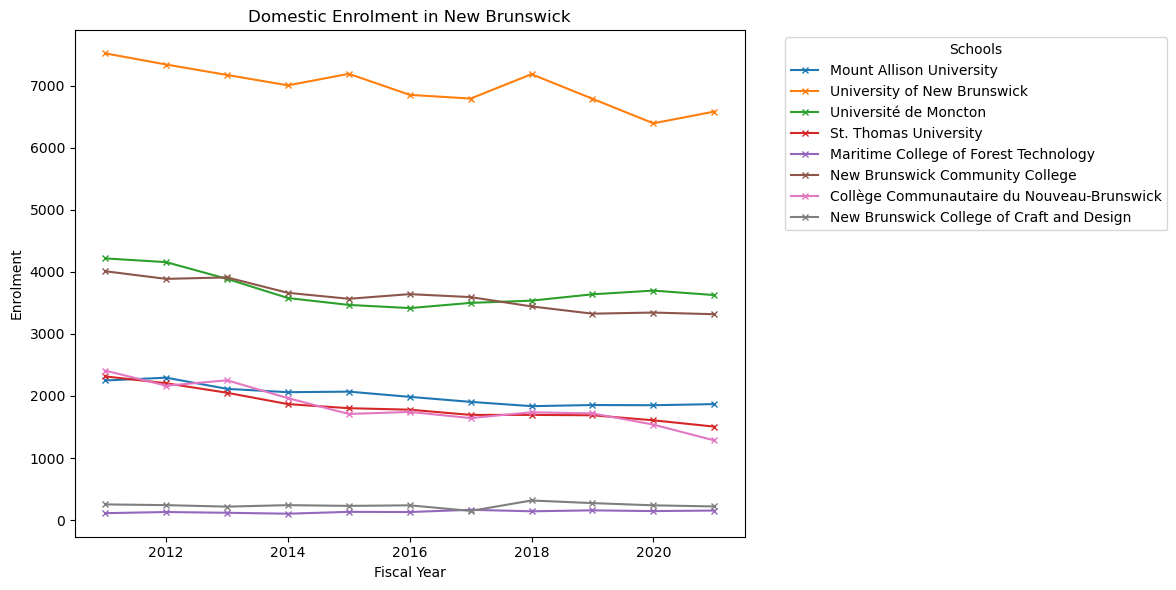

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_91749/2396063517.py:30: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



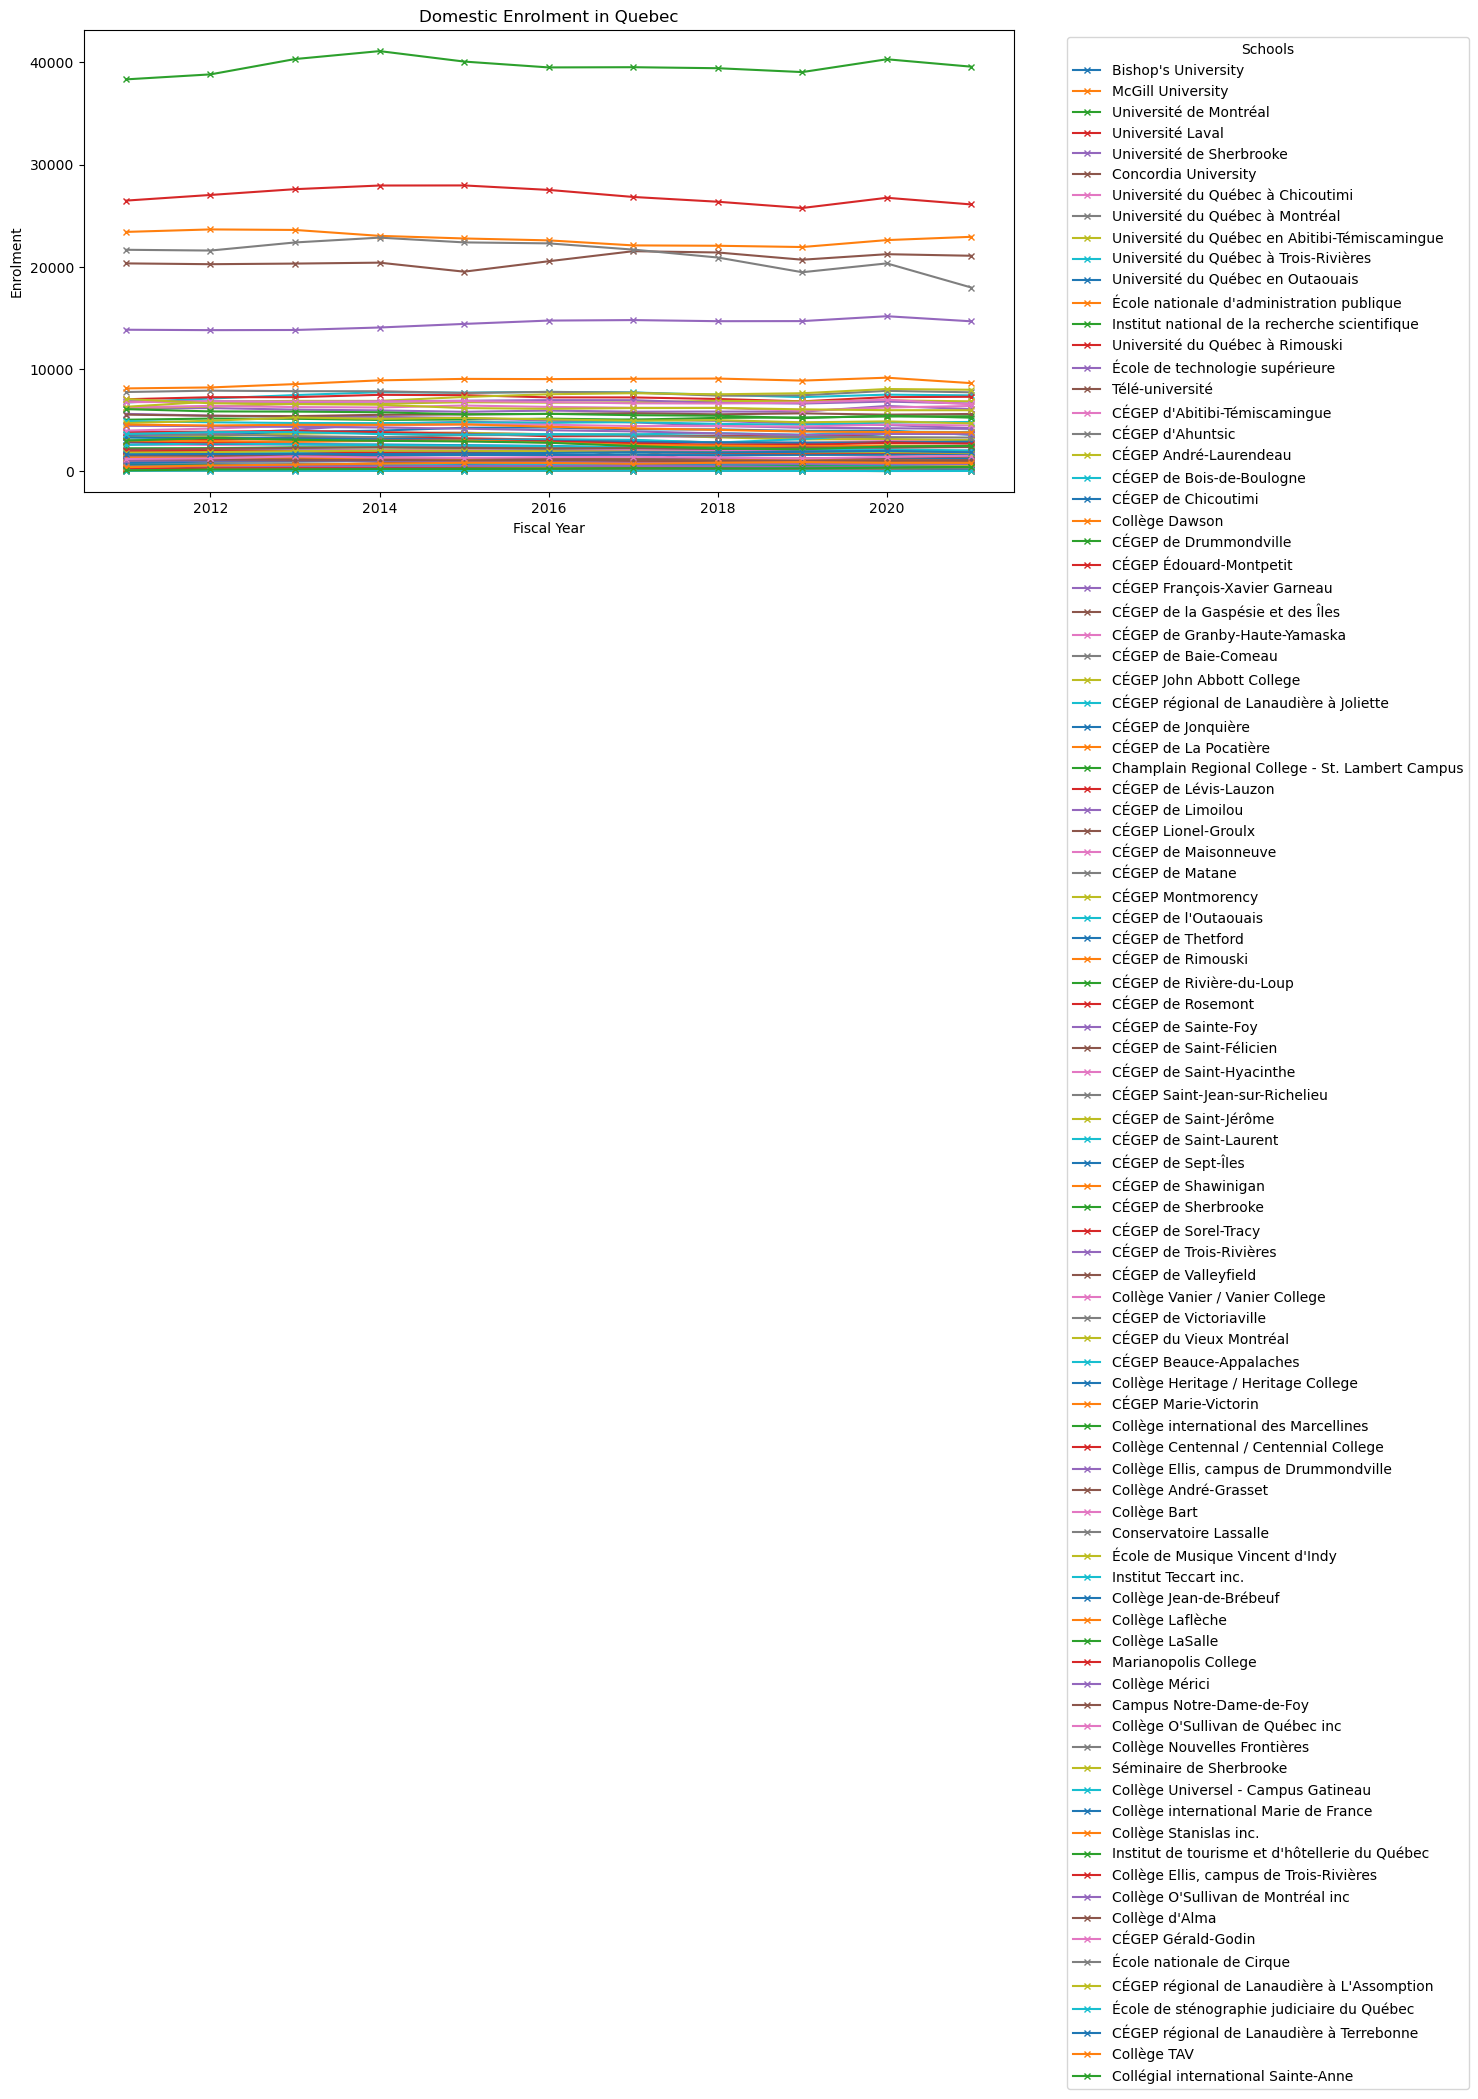

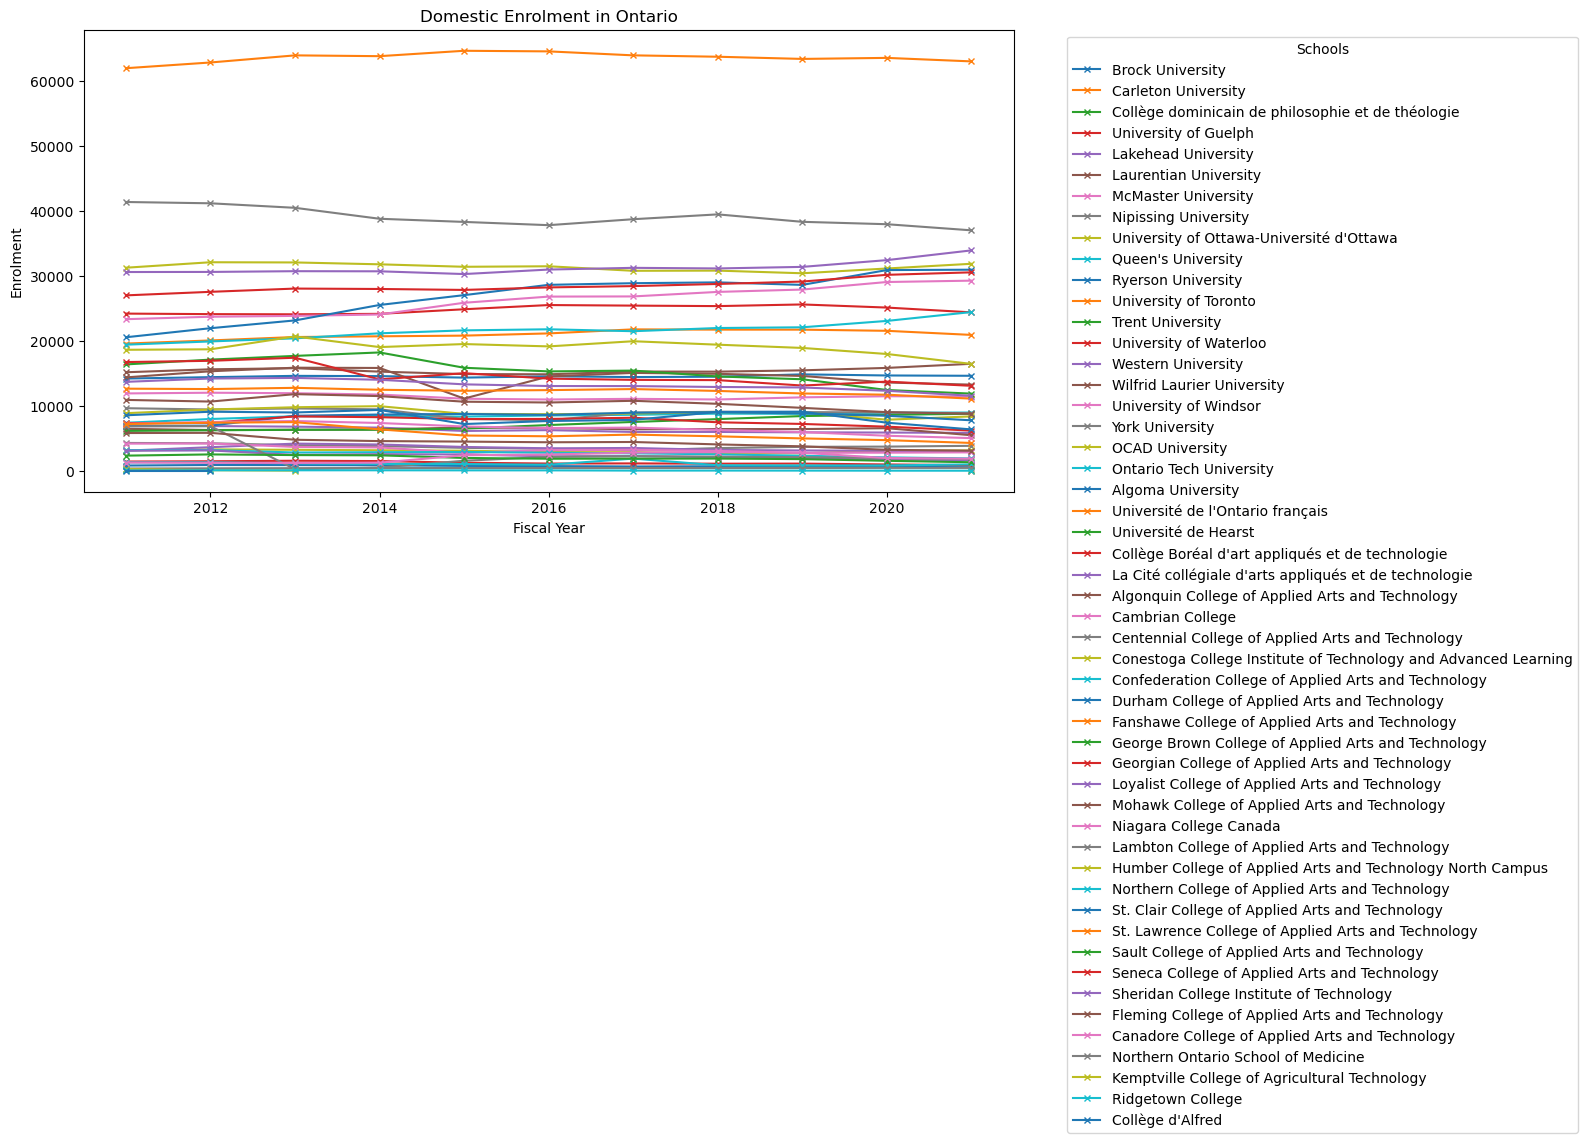

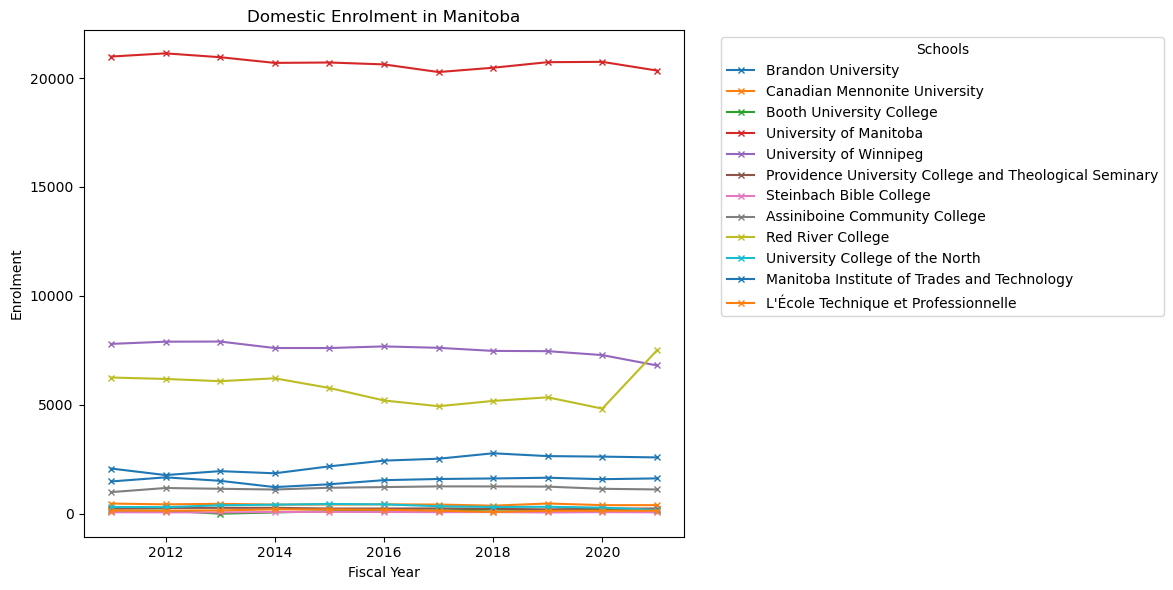

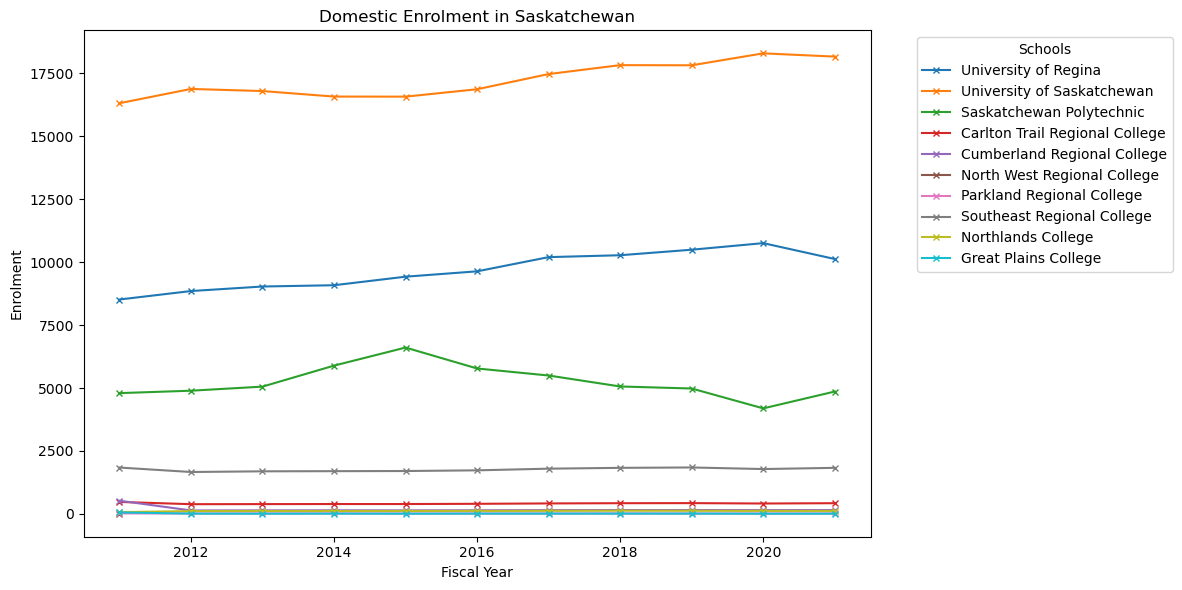

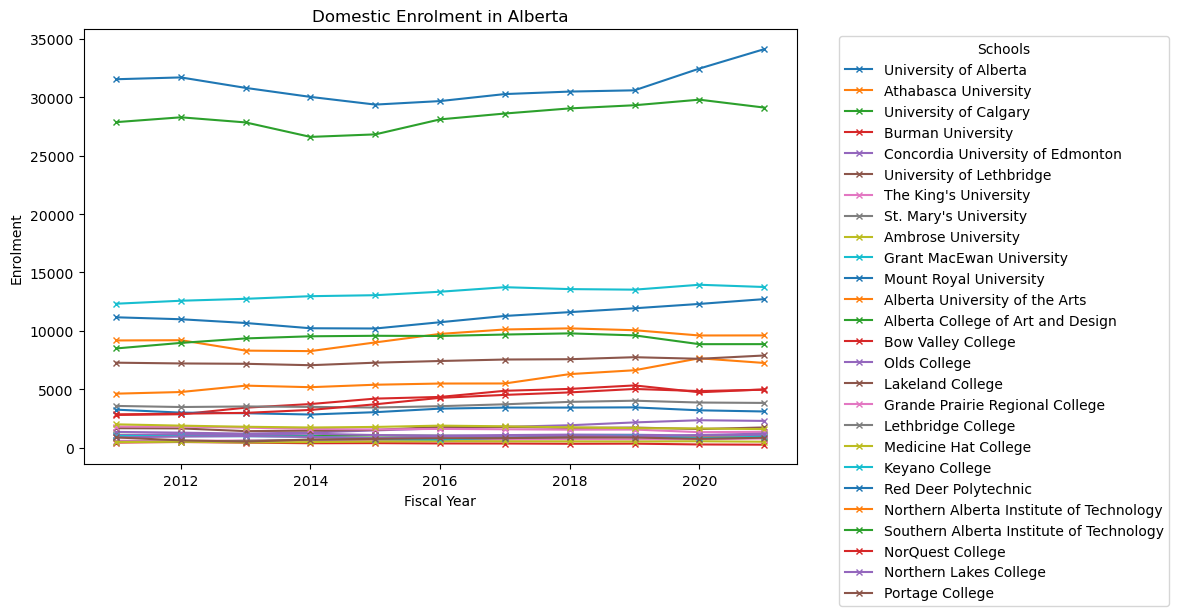

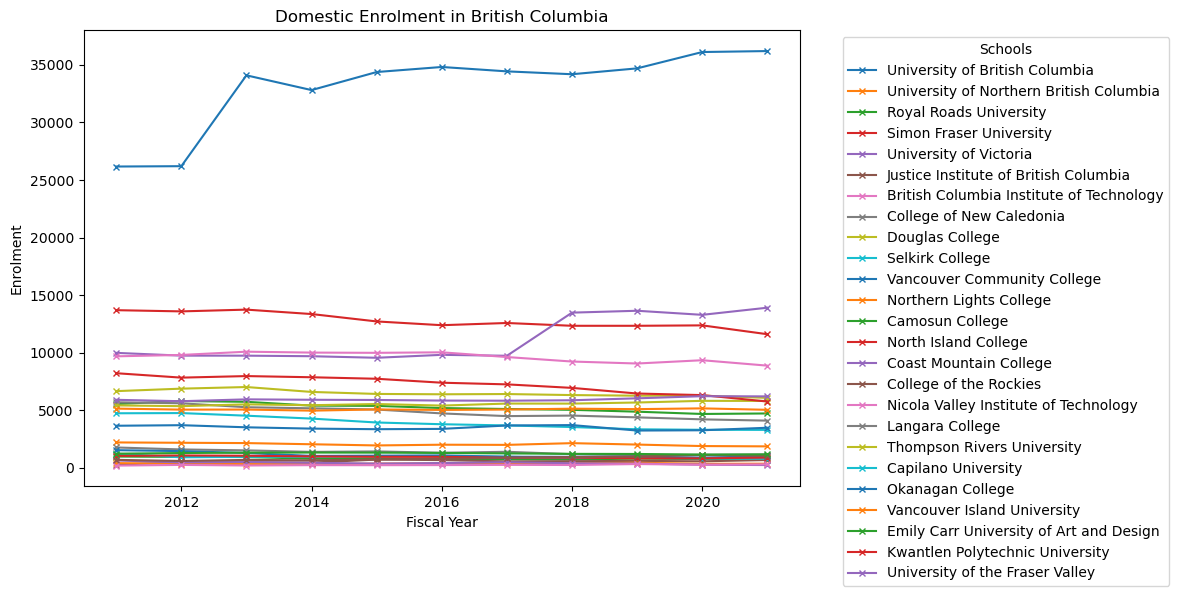

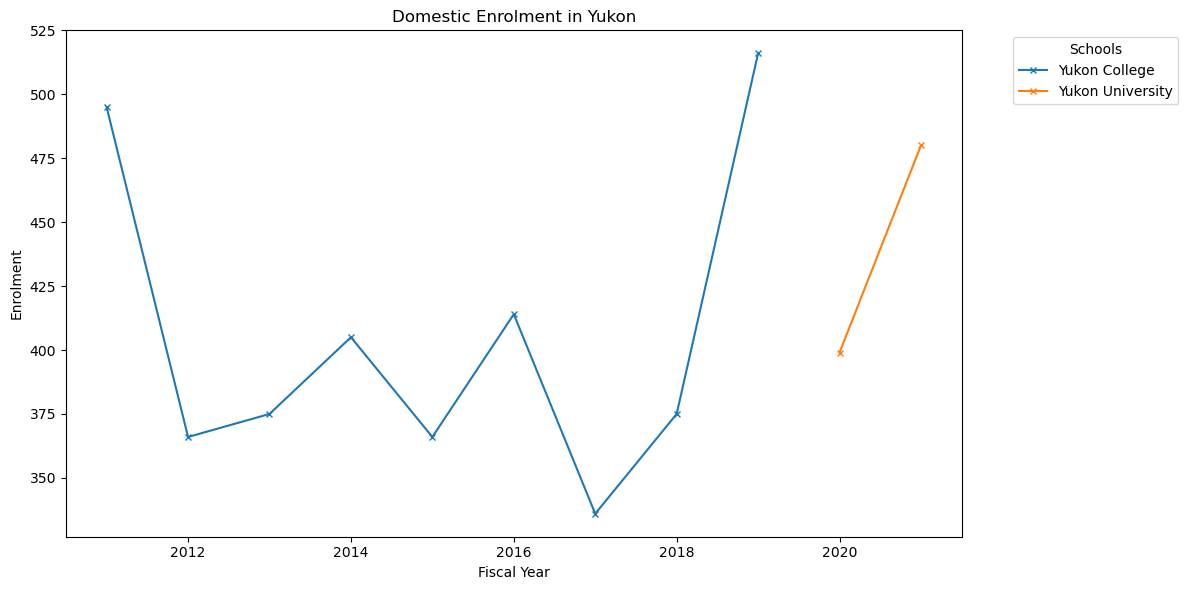

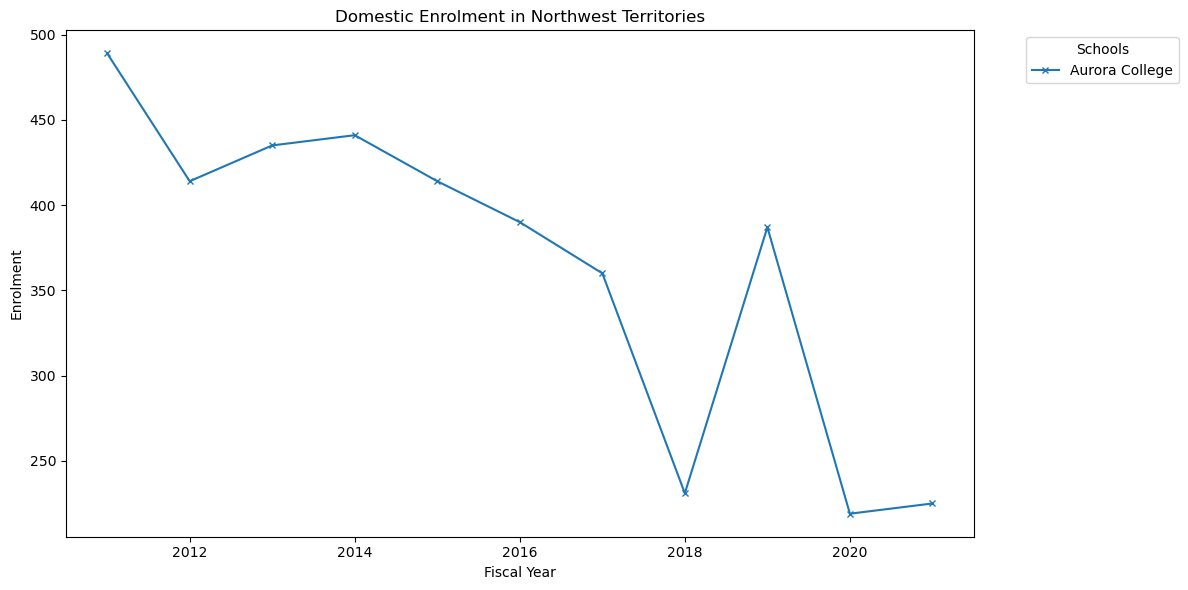

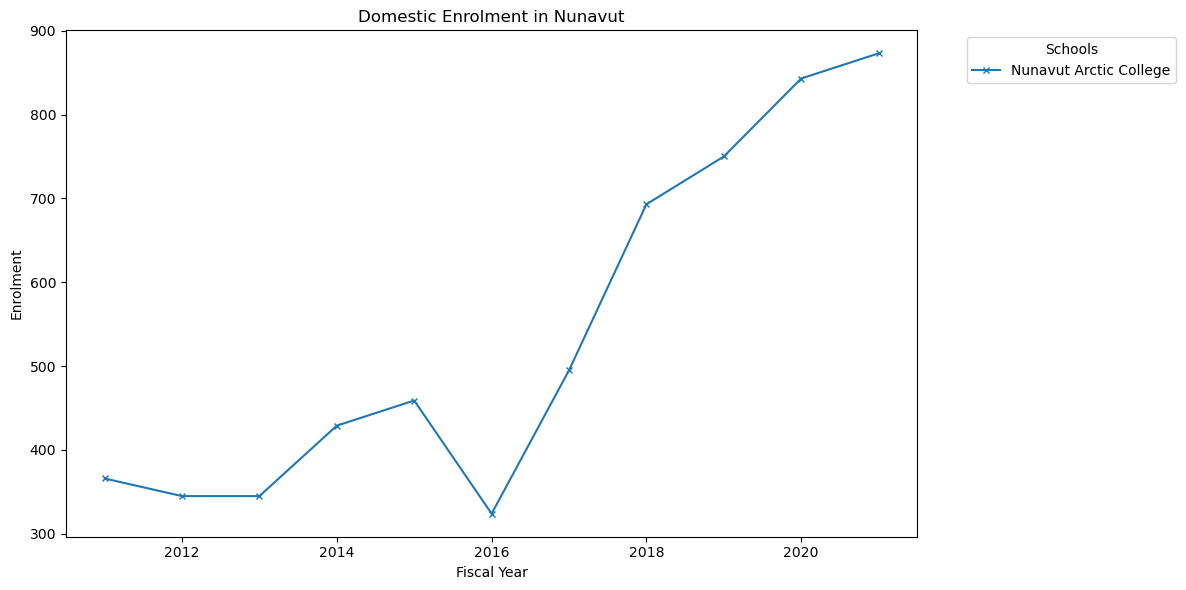

In [202]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df[colleges_universities_df['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'Domestic Enrolment in {province}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## International Students from Statcan info 2011-2021

In [203]:
# Try reading the CSV with a different encoding
df_intl = pd.read_csv("/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/statcan_data/statcan-FT-intl.csv", encoding='utf-8')

In [204]:
df_intl.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

In [205]:
# rename columns
df_intl.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [206]:
df_intl["FY Start"] = df_intl["FY Start"].apply(lambda x: int(x[:4]))

In [207]:
df_intl

FY Start                        School/Locality Registration status  \
0         2011                                 Canada   Full-time student   
1         2012                                 Canada   Full-time student   
2         2013                                 Canada   Full-time student   
3         2014                                 Canada   Full-time student   
4         2015                                 Canada   Full-time student   
...        ...                                    ...                 ...   
2565      2016                  Northwest Territories   Full-time student   
2566      2011  Aurora College, Northwest Territories   Full-time student   
2567      2016  Aurora College, Northwest Territories   Full-time student   
2568      2014                                Nunavut   Full-time student   
2569      2014        Nunavut Arctic College, Nunavut   Full-time student   

                      Status  Enrolment  
0     International students   127467.0  
1     International students   141675.0  
2     International students   160038.0  
3     International students   181086.0  
4     International students   195063.0  
...                      ...        ...  
2565  International students        0.0  
2566  International students        3.0  
2567  International students        0.0  
2568  International students        3.0  
2569  International students        3.0  

[2570 rows x 5 columns]

In [208]:
# same as above to split provinces and territories with variables set above

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df_intl['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df_intl = df_intl[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df_intl = df_intl[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df_intl['Institution Name'] = non_canada_df_intl['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df_intl = non_canada_df_intl.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# Optionally, save the DataFrames to CSVs
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)

Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_91749/903403980.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualising International Enrolment across Provinces & Schools 2011-2021

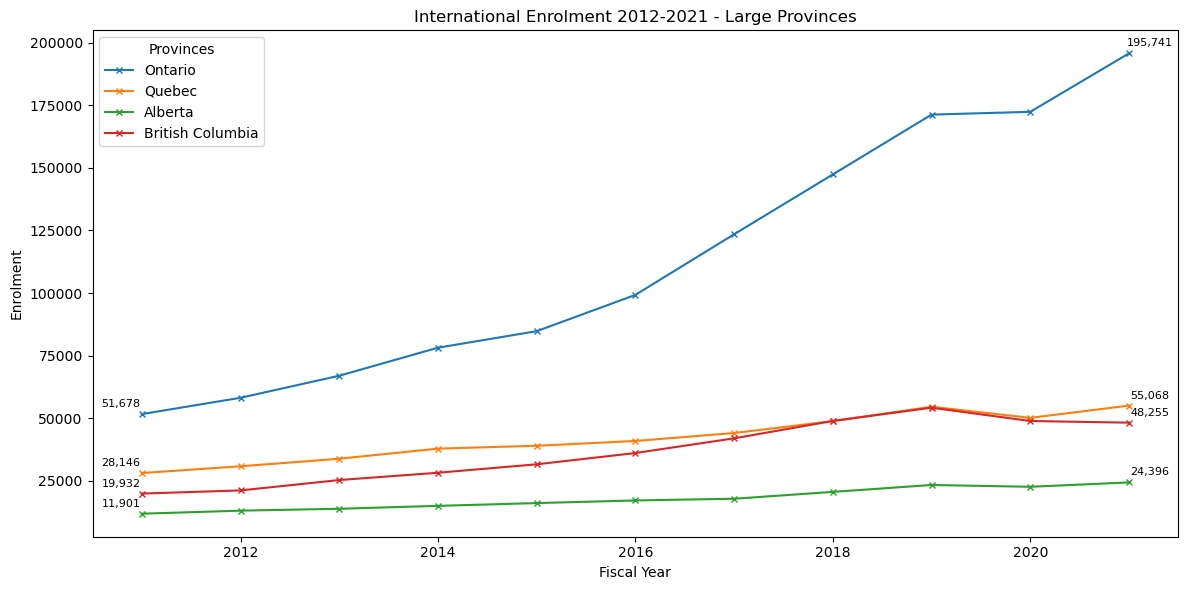

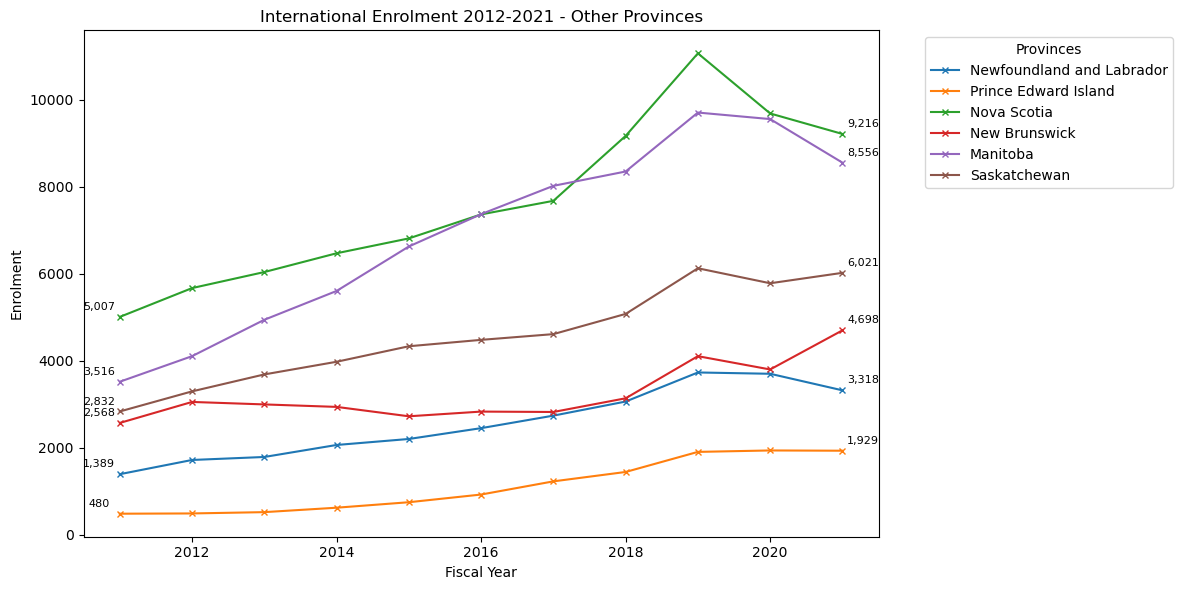

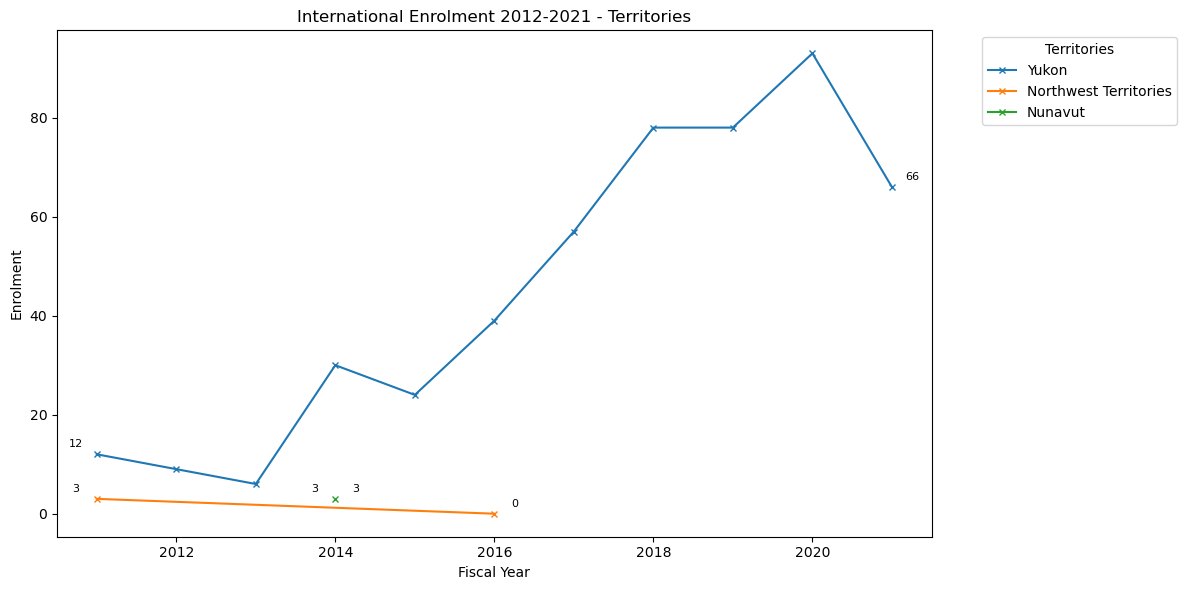

In [209]:
# Filter out rows where 'School/Locality' is "Canada"
provinces_df_intl = canada_df_intl[~canada_df_intl['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df_intl['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Function to annotate the first and last y-values
def annotate_first_and_last_points(ax, x_data, y_data, label):
    if len(x_data) > 0 and len(y_data) > 0:
        # Annotate the first point (Fiscal Year 2011)
        ax.annotate(f'{y_data.iloc[0]:,.0f}', (x_data.iloc[0], y_data.iloc[0]),
                    textcoords="offset points", xytext=(-15, 5), ha='center', fontsize=8)
        
        # Annotate the last point (Fiscal Year 2021)
        ax.annotate(f'{y_data.iloc[-1]:,.0f}', (x_data.iloc[-1], y_data.iloc[-1]),
                    textcoords="offset points", xytext=(15, 5), ha='center', fontsize=8)

# Create the first graph for large population provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2012-2021 - Large Provinces')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
fig, ax = plt.subplots(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    ax.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, province_data['FY Start'], province_data['Enrolment'], province)
ax.set_title('International Enrolment 2012-2021 - Other Provinces')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
fig, ax = plt.subplots(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df_intl[provinces_df_intl['School/Locality'] == territory]
    ax.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
    # Annotate the first and last y-values
    annotate_first_and_last_points(ax, territory_data['FY Start'], territory_data['Enrolment'], territory)
ax.set_title('International Enrolment 2012-2021 - Territories')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Enrolment')
ax.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [210]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df_intl[['School Name', 'Province/Territory']] = colleges_universities_df_intl['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df_intl.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df_intl.head())

    FY Start Registration status                  Status  Enrolment  \
22      2011   Full-time student  International students     1341.0   
23      2012   Full-time student  International students     1650.0   
24      2013   Full-time student  International students     1725.0   
25      2014   Full-time student  International students     2019.0   
26      2015   Full-time student  International students     2148.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


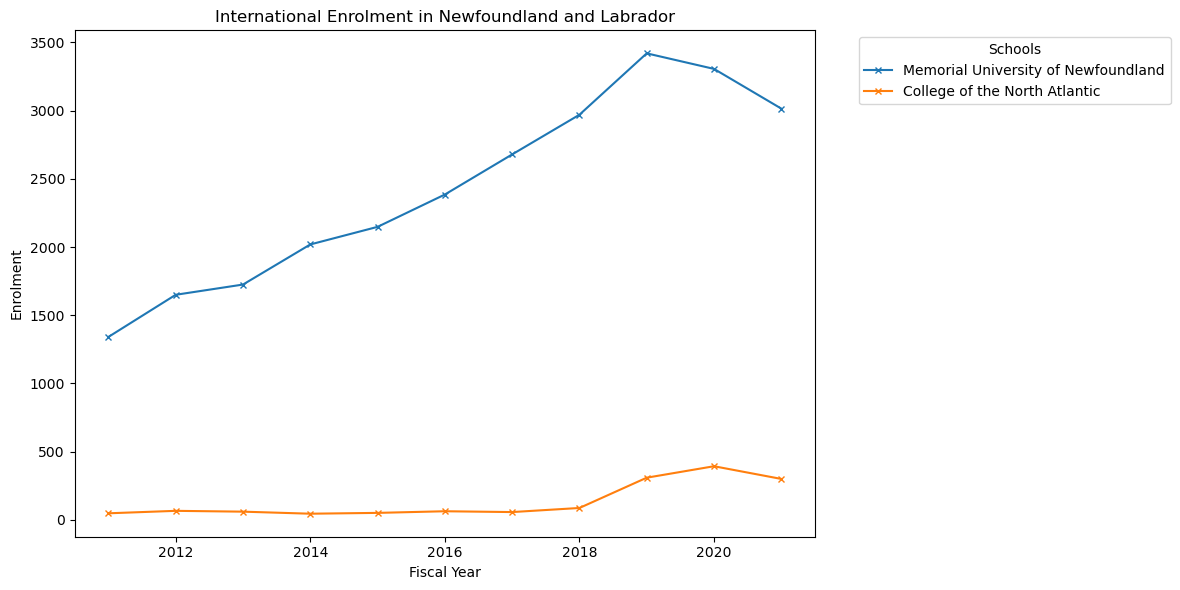

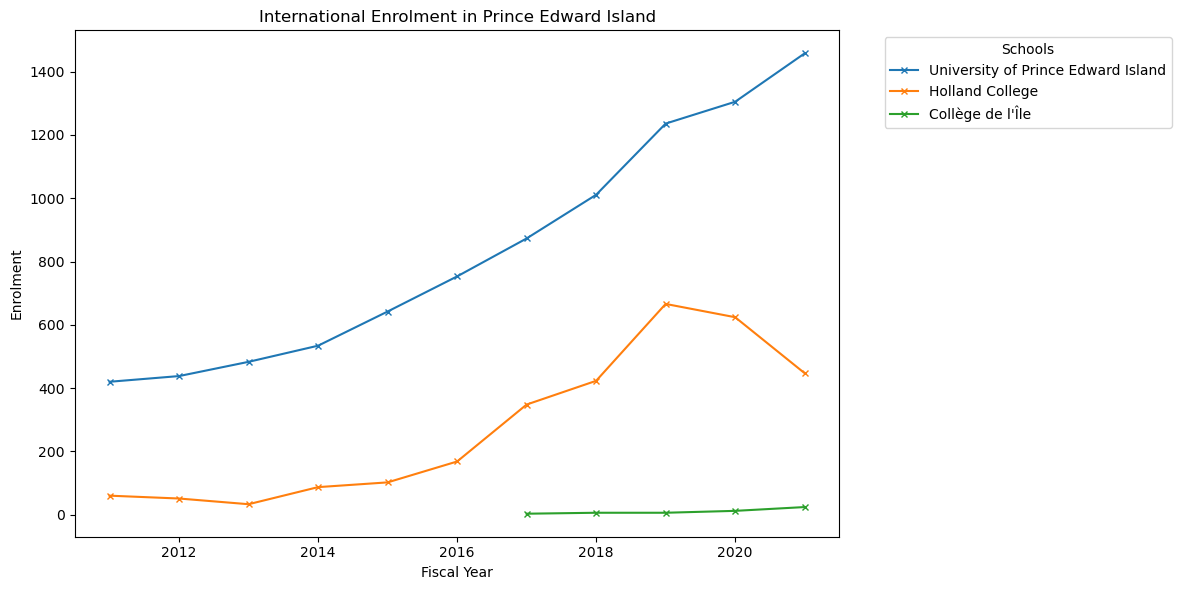

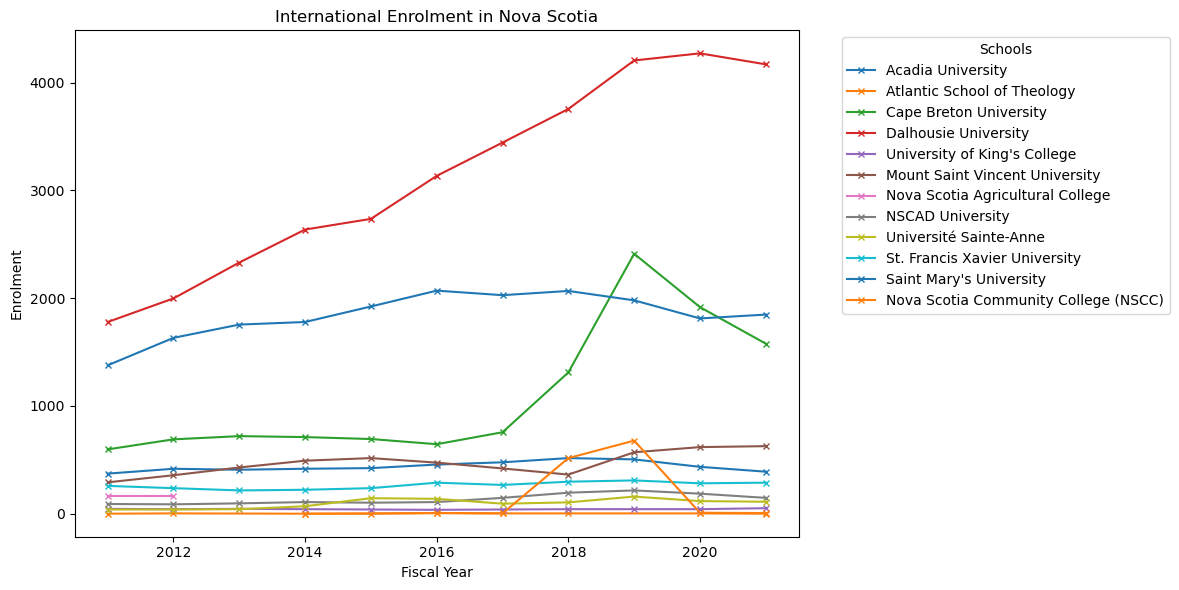

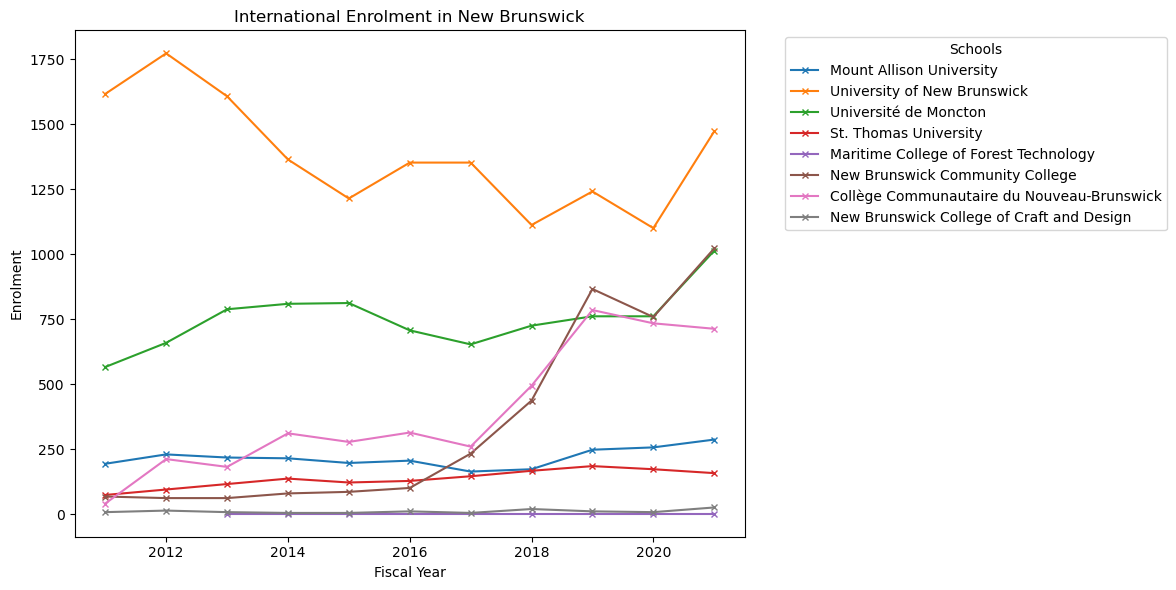

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_91749/1804687708.py:30: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



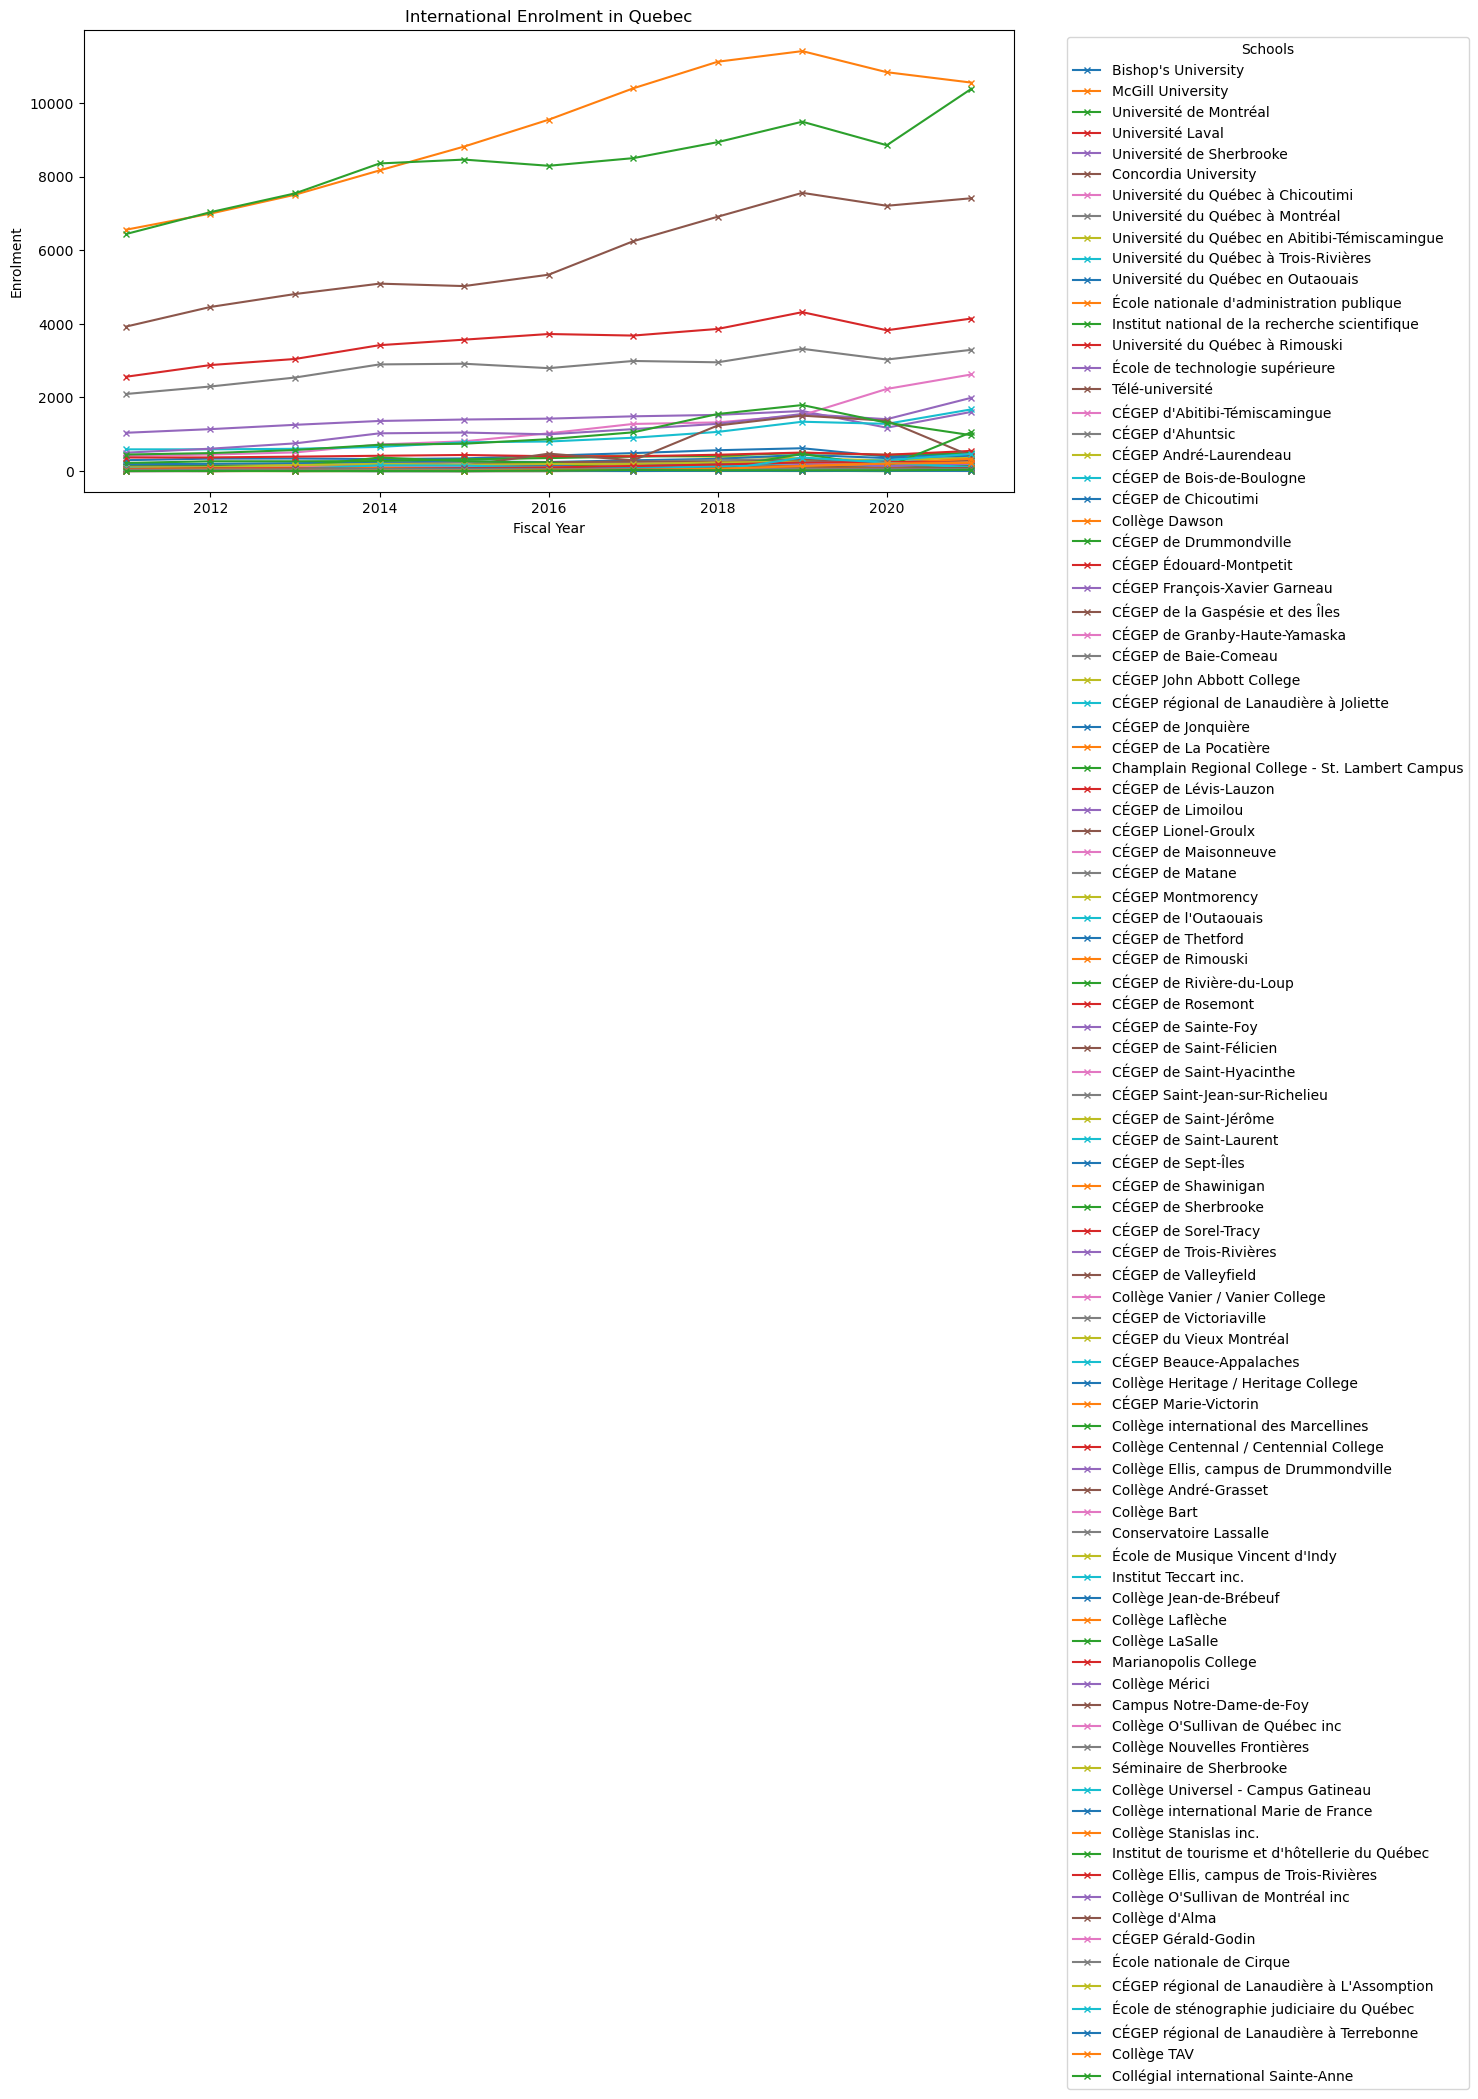

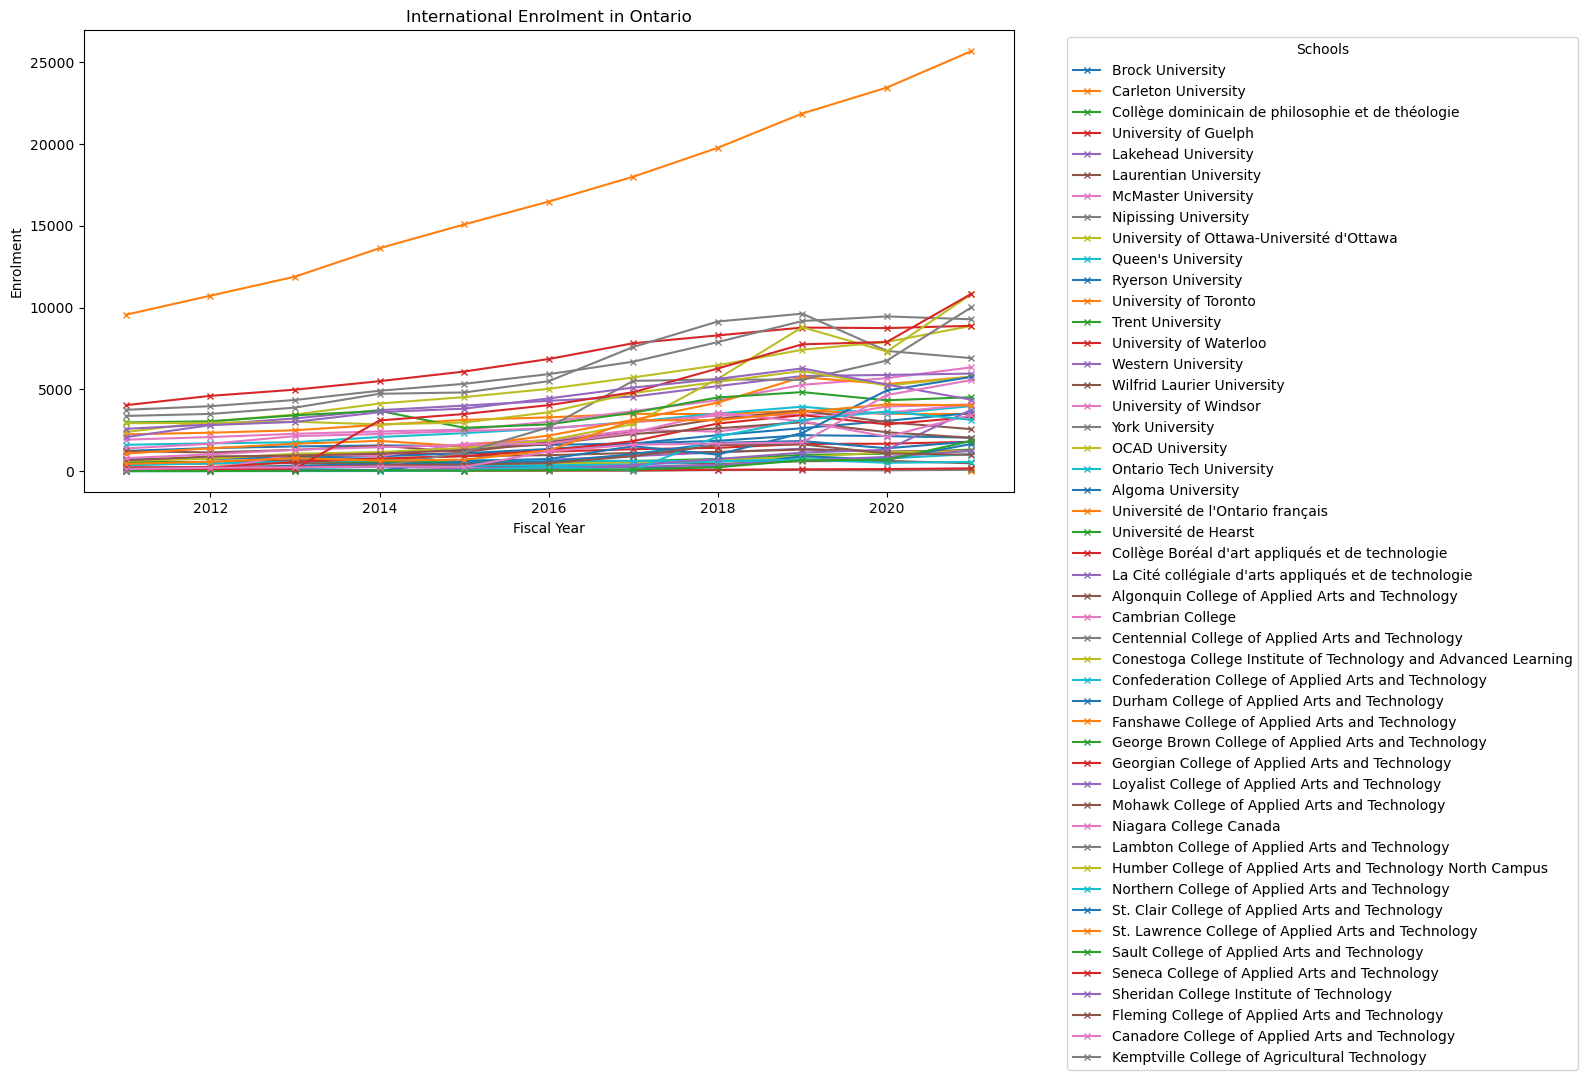

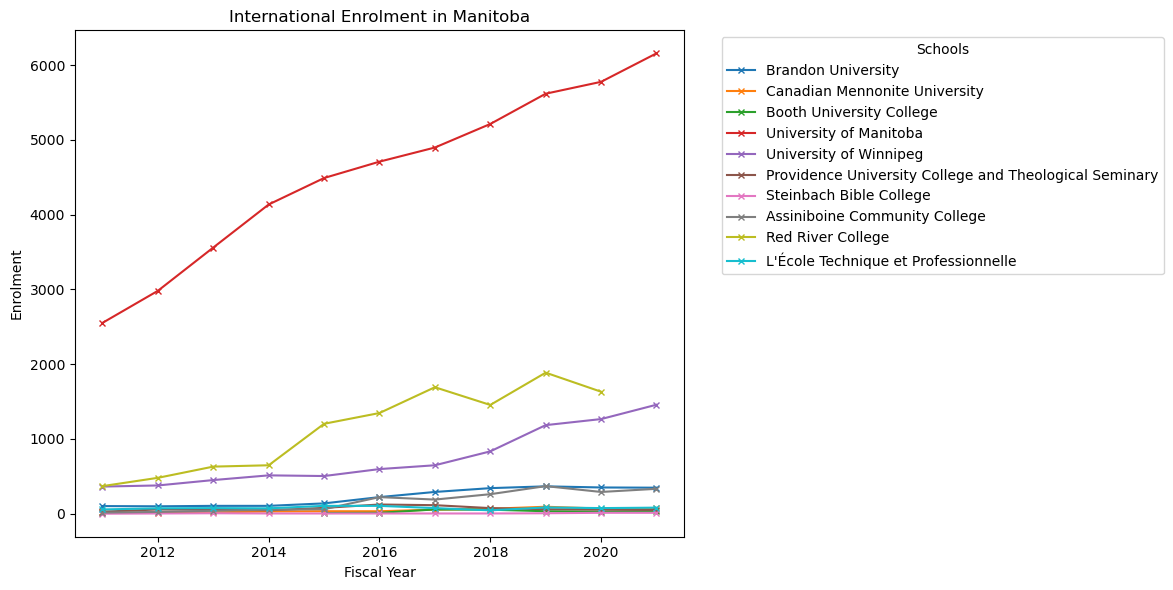

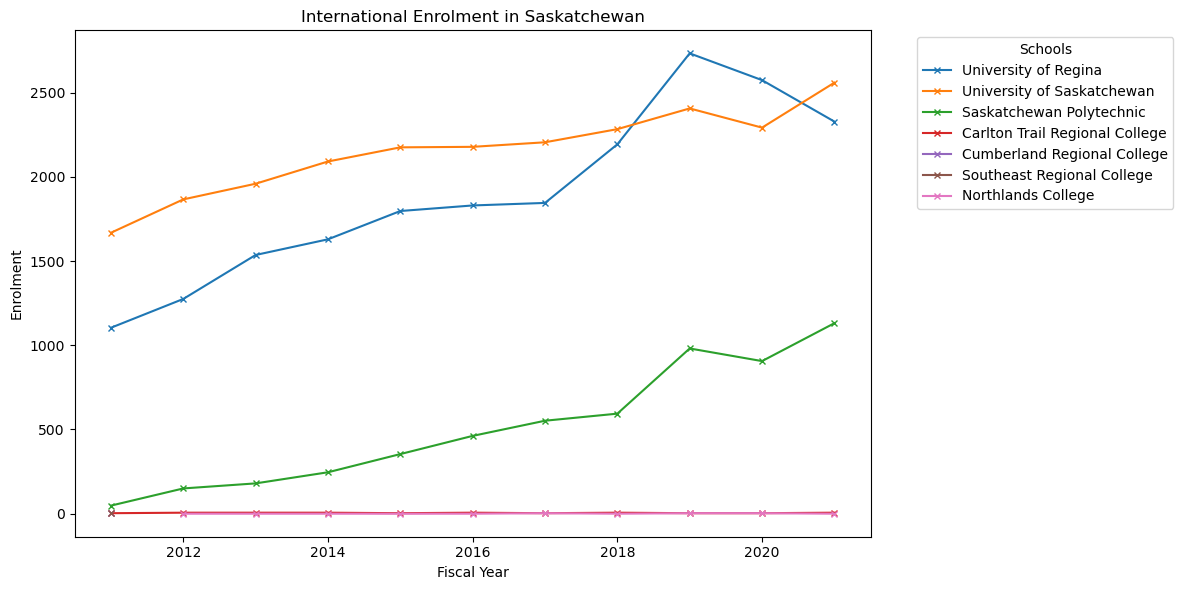

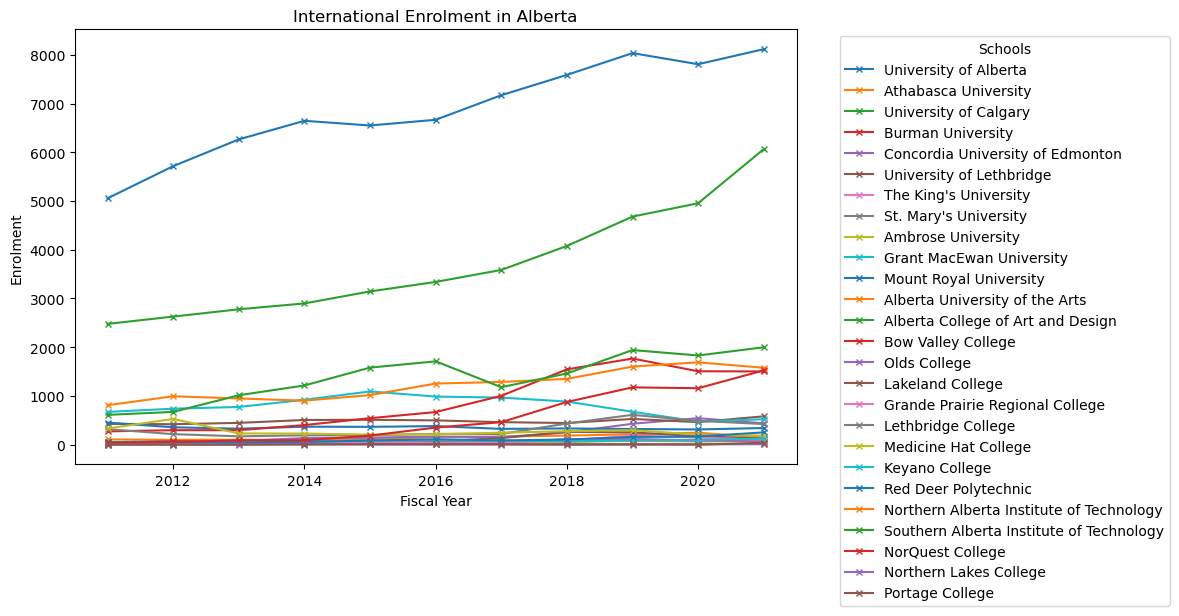

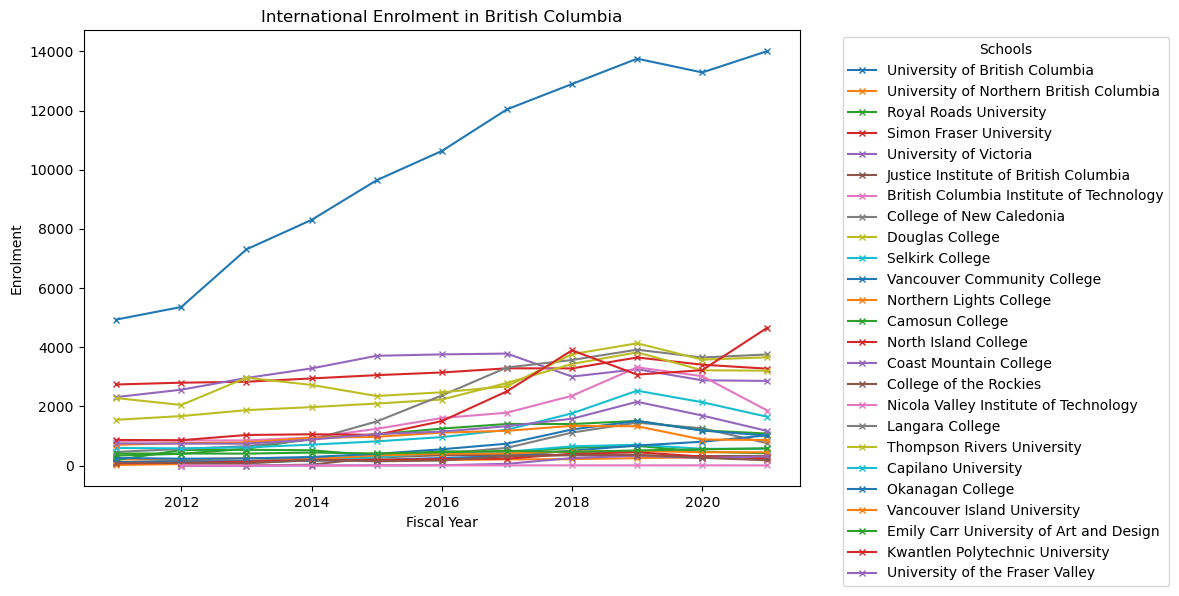

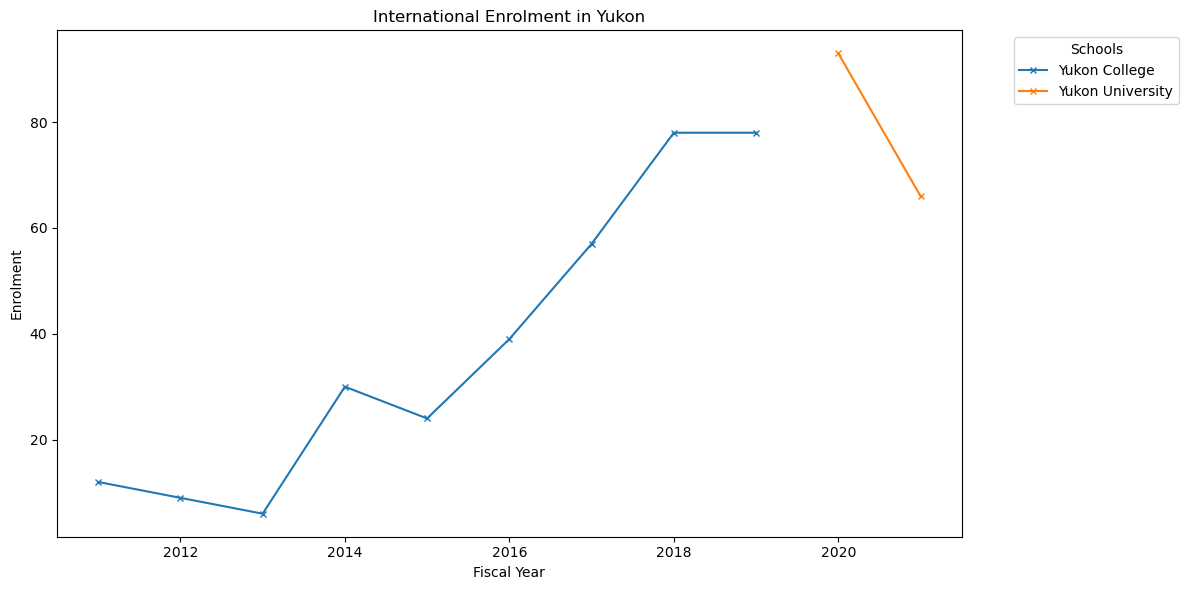

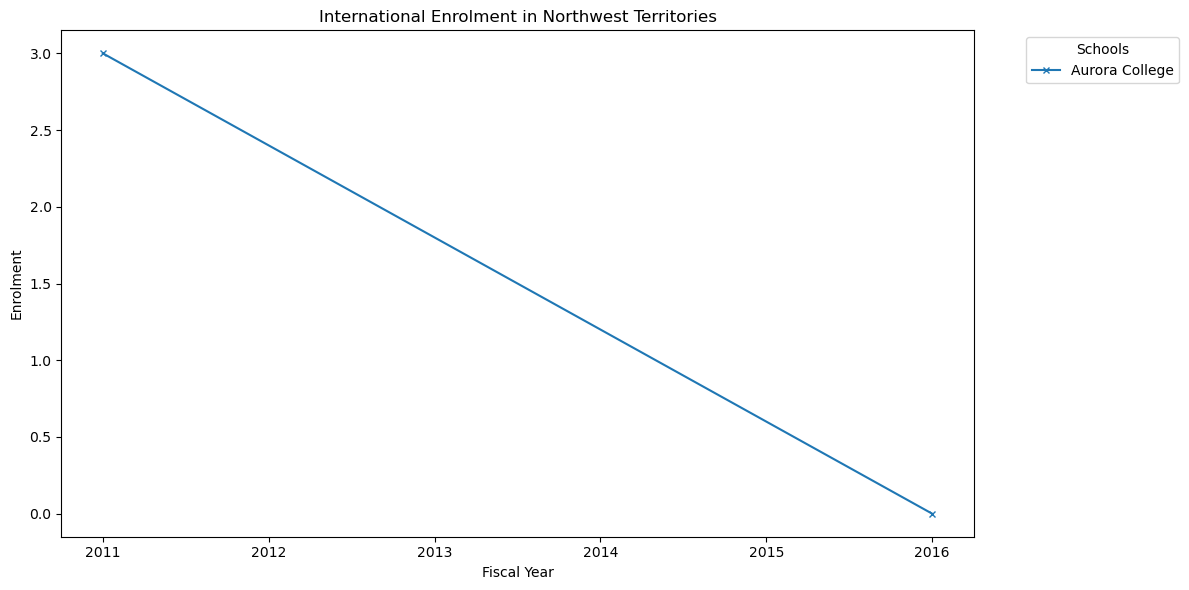

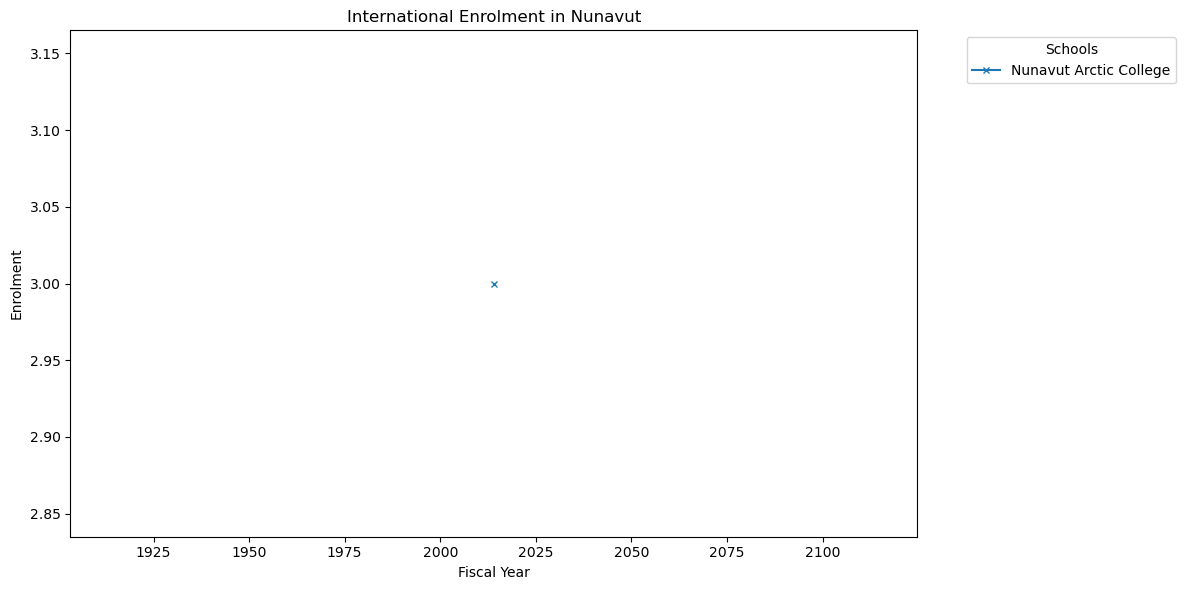

In [211]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df_intl['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df_intl[colleges_universities_df_intl['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'International Enrolment in {province}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Combining Domestic and International enrolment in each province

### Pivot the tables so that every row is one institution in one year, with international and domestic enrolment, which we will then combine in one dataframe

In [212]:
colleges_universities_df.head()

FY Start Registration status             Status  Enrolment  \
22      2011   Full-time student  Canadian students    14097.0   
23      2012   Full-time student  Canadian students    13923.0   
24      2013   Full-time student  Canadian students    13611.0   
25      2014   Full-time student  Canadian students    12996.0   
26      2015   Full-time student  Canadian students    12795.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador

In [213]:
colleges_universities_df_intl.head()

FY Start Registration status                  Status  Enrolment  \
22      2011   Full-time student  International students     1341.0   
23      2012   Full-time student  International students     1650.0   
24      2013   Full-time student  International students     1725.0   
25      2014   Full-time student  International students     2019.0   
26      2015   Full-time student  International students     2148.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador

Because of the very small numbers involved I will ignore the territories

In [214]:
# List of territories to exclude
territories = ["Yukon", "Northwest Territories", "Nunavut"]

# Step 1: Filter out territories from colleges_universities_df and include 'Province/Territory' in the index
domestic_df = colleges_universities_df[
    (colleges_universities_df['Status'] == 'Canadian students') &
    (~colleges_universities_df['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'Domestic Enrolment'
domestic_df.rename(columns={'Enrolment': 'Domestic Enrolment'}, inplace=True)

# Step 2: Filter out territories from colleges_universities_df_intl and include 'Province/Territory' in the index
international_df = colleges_universities_df_intl[
    (colleges_universities_df_intl['Status'] == 'International students') &
    (~colleges_universities_df_intl['Province/Territory'].isin(territories))
].pivot_table(
    index=['School Name', 'Province/Territory', 'FY Start'],
    values='Enrolment',
    aggfunc='sum'
).reset_index()

# Rename the 'Enrolment' column to 'International Enrolment'
international_df.rename(columns={'Enrolment': 'International Enrolment'}, inplace=True)

# Step 3: Join the two DataFrames on 'School Name', 'Province/Territory', and 'FY Start'
combined_df = pd.merge(
    domestic_df,
    international_df,
    on=['School Name', 'Province/Territory', 'FY Start'],
    how='outer'
)

# Fill any NaN values with 0, as some institutions might not have data for both domestic and international enrolments
combined_df.fillna(0, inplace=True)

# Display the combined DataFrame
print(combined_df)


                    School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2011   
1             Acadia University        Nova Scotia      2012   
2             Acadia University        Nova Scotia      2013   
3             Acadia University        Nova Scotia      2014   
4             Acadia University        Nova Scotia      2015   
...                         ...                ...       ...   
2557  École nationale de Cirque             Quebec      2017   
2558  École nationale de Cirque             Quebec      2018   
2559  École nationale de Cirque             Quebec      2019   
2560  École nationale de Cirque             Quebec      2020   
2561  École nationale de Cirque             Quebec      2021   

      Domestic Enrolment  International Enrolment  
0                 2976.0                    372.0  
1                 3135.0                    417.0  
2                 3288.0                    408.0  
3                 3240.

In [215]:
combined_df

School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2011   
1             Acadia University        Nova Scotia      2012   
2             Acadia University        Nova Scotia      2013   
3             Acadia University        Nova Scotia      2014   
4             Acadia University        Nova Scotia      2015   
...                         ...                ...       ...   
2557  École nationale de Cirque             Quebec      2017   
2558  École nationale de Cirque             Quebec      2018   
2559  École nationale de Cirque             Quebec      2019   
2560  École nationale de Cirque             Quebec      2020   
2561  École nationale de Cirque             Quebec      2021   

      Domestic Enrolment  International Enrolment  
0                 2976.0                    372.0  
1                 3135.0                    417.0  
2                 3288.0                    408.0  
3                 3240.0                    417.0  
4                 3030.0                    423.0  
...                  ...                      ...  
2557                57.0                     51.0  
2558                42.0                     54.0  
2559                69.0                     60.0  
2560                63.0                     51.0  
2561                45.0                     54.0  

[2562 rows x 5 columns]

We now have every institution in every FY from 2011- to 2021- with their domestic and international enrolment side by side

### Question: Do the different provinces tell different stories of their domestic/international enrolment ratios over the last ten years?

In [216]:
# create a domestic/international ratio column
combined_df['Int/Dom Ratio'] = combined_df['International Enrolment'] / combined_df['Domestic Enrolment']

In [217]:
combined_df

School Name Province/Territory  FY Start  \
0             Acadia University        Nova Scotia      2011   
1             Acadia University        Nova Scotia      2012   
2             Acadia University        Nova Scotia      2013   
3             Acadia University        Nova Scotia      2014   
4             Acadia University        Nova Scotia      2015   
...                         ...                ...       ...   
2557  École nationale de Cirque             Quebec      2017   
2558  École nationale de Cirque             Quebec      2018   
2559  École nationale de Cirque             Quebec      2019   
2560  École nationale de Cirque             Quebec      2020   
2561  École nationale de Cirque             Quebec      2021   

      Domestic Enrolment  International Enrolment  Int/Dom Ratio  
0                 2976.0                    372.0       0.125000  
1                 3135.0                    417.0       0.133014  
2                 3288.0                    408.0       0.124088  
3                 3240.0                    417.0       0.128704  
4                 3030.0                    423.0       0.139604  
...                  ...                      ...            ...  
2557                57.0                     51.0       0.894737  
2558                42.0                     54.0       1.285714  
2559                69.0                     60.0       0.869565  
2560                63.0                     51.0       0.809524  
2561                45.0                     54.0       1.200000  

[2562 rows x 6 columns]

In order to plot the provincial behaviour as a total and an average, we will create 2 new record rows for every province and every FY. One that average the figures for every province in every year and one that sums them up

In [218]:
# Mapping of full province names to their codes
province_codes = {
    "British Columbia": "BC",
    "Alberta": "AB",
    "Ontario": "ON",
    "Prince Edward Island": "PEI",
    "New Brunswick": "NB",
    "Nova Scotia": "NS",
    "Saskatchewan": "SK",
    "Manitoba": "MB",
    "Quebec": "QC",
    "Newfoundland and Labrador": "NL"
}

# Make a copy of the existing combined_df to add new records
new_records = []

# Get unique provinces and fiscal years
provinces = combined_df['Province/Territory'].unique()
fiscal_years = combined_df['FY Start'].unique()

# Iterate over each province and fiscal year to calculate totals and averages
for province in provinces:
    for fy in fiscal_years:
        # Filter the data for the current province and fiscal year
        province_data = combined_df[
            (combined_df['Province/Territory'] == province) & (combined_df['FY Start'] == fy)
        ]
        
        # Calculate total and average values
        domestic_total = province_data['Domestic Enrolment'].sum()
        domestic_avg = province_data['Domestic Enrolment'].mean()
        intl_total = province_data['International Enrolment'].sum()
        intl_avg = province_data['International Enrolment'].mean()
        int_dom_ratio_total = (intl_total / domestic_total) if domestic_total != 0 else 0
        int_dom_ratio_avg = (intl_avg / domestic_avg) if domestic_avg != 0 else 0
        
        # Get the province code from the dictionary
        province_code = province_codes.get(province, province)  # Default to the full name if not found
        
        # Create School Name entries using province codes
        school_name_total = f"{province_code} Total"
        school_name_avg = f"{province_code} Average"
        
        # Append total record
        new_records.append({
            'School Name': school_name_total,
            'Province/Territory': province,
            'FY Start': fy,
            'Domestic Enrolment': domestic_total,
            'International Enrolment': intl_total,
            'Int/Dom Ratio': int_dom_ratio_total
        })
        
        # Append average record
        new_records.append({
            'School Name': school_name_avg,
            'Province/Territory': province,
            'FY Start': fy,
            'Domestic Enrolment': domestic_avg,
            'International Enrolment': intl_avg,
            'Int/Dom Ratio': int_dom_ratio_avg
        })

# Convert new records to a DataFrame
new_records_df = pd.DataFrame(new_records)

# Append the new records to the original DataFrame
combined_df = pd.concat([combined_df, new_records_df], ignore_index=True)

# Display the updated DataFrame
print(combined_df)


            School Name    Province/Territory  FY Start  Domestic Enrolment  \
0     Acadia University           Nova Scotia      2011              2976.0   
1     Acadia University           Nova Scotia      2012              3135.0   
2     Acadia University           Nova Scotia      2013              3288.0   
3     Acadia University           Nova Scotia      2014              3240.0   
4     Acadia University           Nova Scotia      2015              3030.0   
...                 ...                   ...       ...                 ...   
2777        PEI Average  Prince Edward Island      2019              1799.0   
2778          PEI Total  Prince Edward Island      2020              5442.0   
2779        PEI Average  Prince Edward Island      2020              1814.0   
2780          PEI Total  Prince Edward Island      2021              5028.0   
2781        PEI Average  Prince Edward Island      2021              1676.0   

      International Enrolment  Int/Dom Ratio  
0   

In [219]:
combined_df.tail(10)

School Name    Province/Territory  FY Start  Domestic Enrolment  \
2772    PEI Total  Prince Edward Island      2017              5601.0   
2773  PEI Average  Prince Edward Island      2017              1867.0   
2774    PEI Total  Prince Edward Island      2018              5046.0   
2775  PEI Average  Prince Edward Island      2018              1682.0   
2776    PEI Total  Prince Edward Island      2019              5397.0   
2777  PEI Average  Prince Edward Island      2019              1799.0   
2778    PEI Total  Prince Edward Island      2020              5442.0   
2779  PEI Average  Prince Edward Island      2020              1814.0   
2780    PEI Total  Prince Edward Island      2021              5028.0   
2781  PEI Average  Prince Edward Island      2021              1676.0   

      International Enrolment  Int/Dom Ratio  
2772                   1224.0       0.218532  
2773                    408.0       0.218532  
2774                   1440.0       0.285375  
2775                    480.0       0.285375  
2776                   1908.0       0.353530  
2777                    636.0       0.353530  
2778                   1941.0       0.356670  
2779                    647.0       0.356670  
2780                   1929.0       0.383652  
2781                    643.0       0.383652

In [220]:
# spot check - Prince Edward Island in 2019
combined_df[
    (combined_df['Province/Territory'] == 'Prince Edward Island') &
    (combined_df['FY Start'] == 2019)
]

School Name    Province/Territory  FY Start  \
554                     Collège de l'Île  Prince Edward Island      2019   
1275                     Holland College  Prince Edward Island      2019   
2238  University of Prince Edward Island  Prince Edward Island      2019   
2776                           PEI Total  Prince Edward Island      2019   
2777                         PEI Average  Prince Edward Island      2019   

      Domestic Enrolment  International Enrolment  Int/Dom Ratio  
554                 18.0                      6.0       0.333333  
1275              2385.0                    666.0       0.279245  
2238              2994.0                   1236.0       0.412826  
2776              5397.0                   1908.0       0.353530  
2777              1799.0                    636.0       0.353530

From the above you can see the Int/Dom ratio is the same in both the average and the total columns which should be the case.


In [230]:
# spot check - quebec in 2019 - lots of CEGEPs and small colleges, potential to skew the provincial numbers with outliers
combined_df[
    (combined_df['Province/Territory'] == 'Quebec') &
    (combined_df['FY Start'] == 2019)
].head(20)

School Name Province/Territory  \
99                               Bishop's University             Quebec   
197                         Campus Notre-Dame-de-Foy             Quebec   
285  Champlain Regional College - St. Lambert Campus             Quebec   
340                            Collège André-Grasset             Quebec   
351                                     Collège Bart             Quebec   
373           Collège Centennal / Centennial College             Quebec   
395                                   Collège Dawson             Quebec   
406           Collège Ellis, campus de Drummondville             Quebec   
417          Collège Ellis, campus de Trois-Rivières             Quebec   
426              Collège Heritage / Heritage College             Quebec   
437                          Collège Jean-de-Brébeuf             Quebec   
448                                  Collège LaSalle             Quebec   
459                                 Collège Laflèche             Quebec   
470                                   Collège Mérici             Quebec   
487               Collège O'Sullivan de Montréal inc             Quebec   
498                 Collège O'Sullivan de Québec inc             Quebec   
509                           Collège Stanislas inc.             Quebec   
520                                      Collège TAV             Quebec   
525              Collège Universel - Campus Gatineau             Quebec   
536                  Collège Vanier / Vanier College             Quebec   

     FY Start  Domestic Enrolment  International Enrolment  Int/Dom Ratio  
99       2019              1971.0                    621.0       0.315068  
197      2019               900.0                     15.0       0.016667  
285      2019              5262.0                     27.0       0.005131  
340      2019              1242.0                    126.0       0.101449  
351      2019               291.0                     15.0       0.051546  
373      2019                42.0                     12.0       0.285714  
395      2019              8868.0                    204.0       0.023004  
406      2019               519.0                      6.0       0.011561  
417      2019               282.0                     12.0       0.042553  
426      2019              1212.0                     27.0       0.022277  
437      2019              1623.0                     21.0       0.012939  
448      2019              2145.0                   1794.0       0.836364  
459      2019              1074.0                     36.0       0.033520  
470      2019               747.0                     45.0       0.060241  
487      2019               387.0                     21.0       0.054264  
498      2019               300.0                     24.0       0.080000  
509      2019               279.0                     63.0       0.225806  
520      2019               894.0                    138.0       0.154362  
525      2019               135.0                    369.0       2.733333  
536      2019              6717.0                    222.0       0.033050

Instead of Matplotlib which is static and would require a lot of tedious coding to separate groups from one another, **Plotly** is an interactive tool/module that lets us flexibly toggle lines on and off. We'll use this moving forward.

In [231]:
# plot of the provincial averages and totals against each other

import plotly.graph_objects as go

# Create a new figure for the averages and totals of all provinces
fig = go.Figure()

# Iterate over each unique province in the combined_df
for province in combined_df['Province/Territory'].unique():
    # Filter the data for the current province and only include records for "Average" and "Total"
    province_data = combined_df[
        (combined_df['Province/Territory'] == province) &
        (combined_df['School Name'].str.contains("Average|Total"))
    ].sort_values(by='FY Start')
    
    # Plot the Domestic Enrolment for the provincial average
    avg_data = province_data[province_data['School Name'].str.contains("Average")]
    fig.add_trace(go.Scatter(
        x=avg_data['FY Start'],
        y=avg_data['Domestic Enrolment'],
        mode='lines+markers',
        name=f"{province} Average Domestic",
        line=dict(dash='solid')
    ))

    # Plot the International Enrolment for the provincial average
    fig.add_trace(go.Scatter(
        x=avg_data['FY Start'],
        y=avg_data['International Enrolment'],
        mode='lines+markers',
        name=f"{province} Average International",
        line=dict(dash='dot')
    ))

    # Plot the Domestic Enrolment for the provincial total
    total_data = province_data[province_data['School Name'].str.contains("Total")]
    fig.add_trace(go.Scatter(
        x=total_data['FY Start'],
        y=total_data['Domestic Enrolment'],
        mode='lines+markers',
        name=f"{province} Total Domestic",
        line=dict(dash='solid')
    ))

    # Plot the International Enrolment for the provincial total
    fig.add_trace(go.Scatter(
        x=total_data['FY Start'],
        y=total_data['International Enrolment'],
        mode='lines+markers',
        name=f"{province} Total International",
        line=dict(dash='dot')
    ))

# Set the title and labels
fig.update_layout(
    title="Provincial Averages and Totals for Domestic and International Enrolment (2011-2021)",
    xaxis_title='Fiscal Year',
    yaxis_title='Enrolment',
    legend_title='Province',
    template='plotly'
)

# Show the interactive plot
fig.show()


### Plotting changes in individual schools' enrolment alongside their provincial average & totals

In [228]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (this will ensure we have a consistent set of colors)
palette = px.colors.qualitative.Plotly  # You can use other palettes like 'Viridis', 'D3', etc.
unique_institutions = combined_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each province to create interactive plots
for province in combined_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = combined_df[combined_df['Province/Territory'] == province]
    
    # Create a new figure
    fig = go.Figure()

    # Get unique institutions in the province, including the average and total records
    institutions_in_province = province_data['School Name'].unique()

    # Plot each institution's Domestic and International Enrolment
    for institution in institutions_in_province:
        institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
        color = institution_colors[institution]  # Use the color from the color mapping
        
        # Add Domestic Enrolment line (solid)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['Domestic Enrolment'],
            mode='lines+markers',
            name=f"{institution} Domestic",
            line=dict(color=color, dash='solid'),  # Solid line for Domestic
            marker=dict(color=color)
        ))

        # Add International Enrolment line (dotted)
        fig.add_trace(go.Scatter(
            x=institution_data['FY Start'],
            y=institution_data['International Enrolment'],
            mode='lines+markers',
            name=f"{institution} International",
            line=dict(color=color, dash='dot'),  # Dotted line for International
            marker=dict(color=color)
        ))

    # Set the title and labels
    fig.update_layout(
        title=f"Enrolment Figures for {province} (2011-2021)",
        xaxis_title='Fiscal Year',
        yaxis_title='Enrolment',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()


In [229]:
import plotly.graph_objects as go
import plotly.express as px

# Generate a color palette using plotly express (to ensure consistent colors)
palette = px.colors.qualitative.Plotly  # You can use other palettes if needed
unique_institutions = combined_df['School Name'].unique()
institution_colors = {institution: palette[i % len(palette)] for i, institution in enumerate(unique_institutions)}

# Iterate over each unique province in the combined_df
for province in combined_df['Province/Territory'].unique():
    # Filter the data for the current province
    province_data = combined_df[combined_df['Province/Territory'] == province]
    
    # Create a new figure for the current province
    fig = go.Figure()

    # Get unique institutions in the province, excluding the provincial total
    institutions_in_province = province_data['School Name'].unique()

    # Plot the Int/Dom Ratio for each institution
    for institution in institutions_in_province:
        # Check if the institution name contains "Total" and skip if it does
        if "Total" not in institution:
            institution_data = province_data[province_data['School Name'] == institution].sort_values(by='FY Start')
            color = institution_colors[institution]  # Use the color from the color mapping
            
            # Add the Int/Dom Ratio line for the institution
            fig.add_trace(go.Scatter(
                x=institution_data['FY Start'],
                y=institution_data['Int/Dom Ratio'],
                mode='lines+markers',
                name=institution,
                line=dict(color=color),  # Use the consistent color
                marker=dict(color=color)
            ))

    # Set the title and labels
    fig.update_layout(
        title=f"International/Domestic Ratio for {province} (2011-2021)",
        xaxis_title='Fiscal Year',
        yaxis_title='Int/Dom Ratio',
        legend_title='Institution',
        template='plotly'
    )
    
    # Show the interactive plot
    fig.show()


## High-level conclusions:

### Some general thoughts before proceeding to analyse further on a provincial level, set against the recent population growth:

![Canada population 2016-2021.png](<attachment:Canada population 2016-2021.png>)
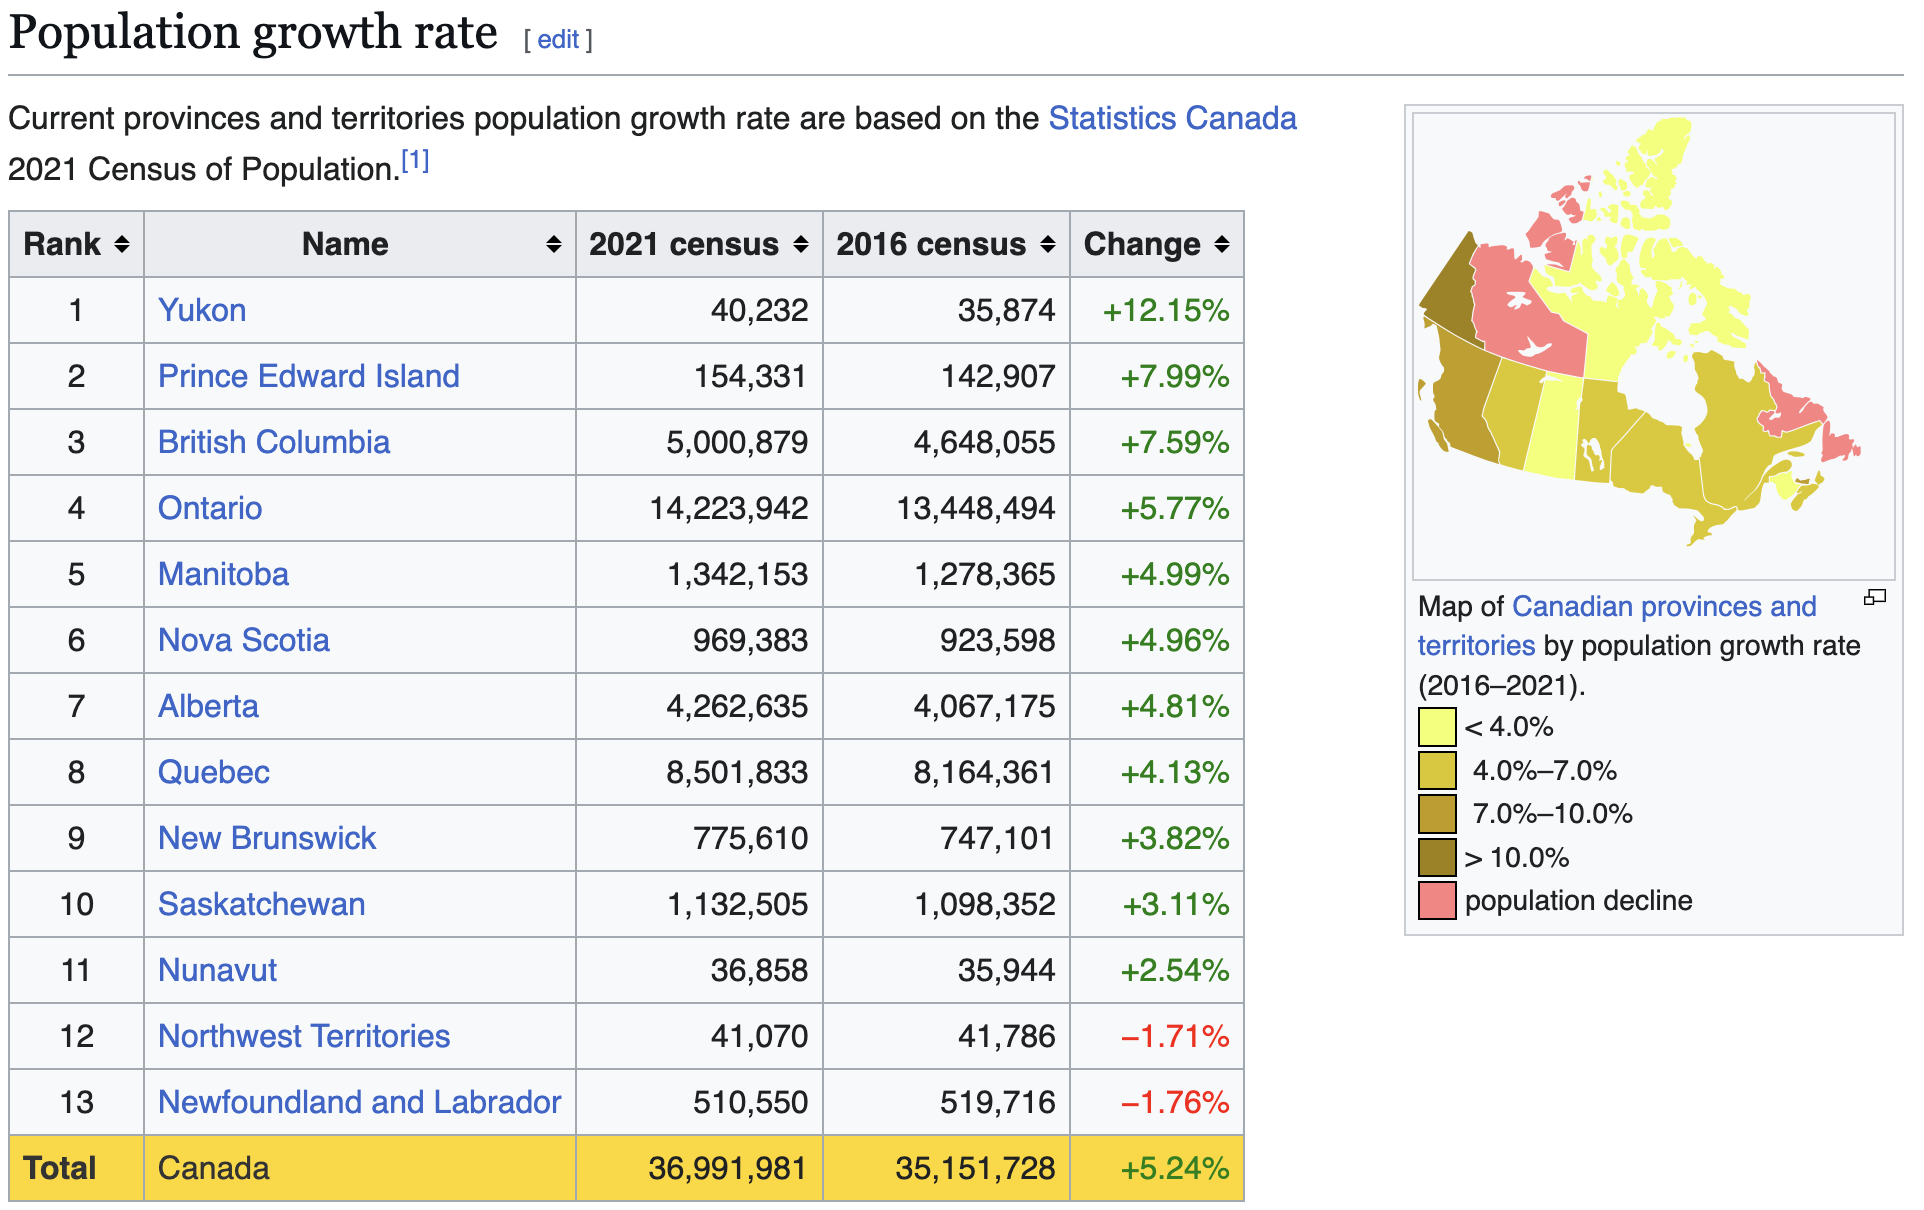

- **Domestic enrolment** has flatlined or declined in most provinces, especially Atlantic Canada, with the exception of some modest growth in Western Canada e.g. Saskatchewan and Alberta.
    - Despite adding 7.5% population, over 300,000 people domestic enrolment in BC has flatlined
    - Enrolment in PEI has declined despite a 8% population growth, and PEI has only three PSIs and only two of significant size.

- Analysis is ignoring NT, YT and NU. The populations are too small for a meaningful interpretation.


- International Enrolment is at least double, in some cases nearly 4x the 2011 levels by 2021.

## Next Steps